# Data Cleaning and Exploratory Data Analysis

Now that we have our main dataset. Let's start to explore the data. This will help us narrow down what we need to clean up, whether there are any outliers, and general trends that we could be looking for in the data. It's important that we stick to our initial hypothesis to avoid P-Hacking but to explore the data to find any information we may not have thought of.

## Part 1:  Importing Dataset
We will start by importing the dataset to work wtih. We will take a look at some general infomation like the size and shape as well as any missing values.

In [122]:
# Library import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Testing Import
from scipy.stats import shapiro, mannwhitneyu, wilcoxon, probplot, kurtosis, skew

In [123]:
# Start by taking a quick look at the files in our directory so we can pull the right one
print(os.listdir())

['.git', '.gitignore', '02-tmacphe-kirtland-ramiab-KB.pdf', 'environment.yml', 'explanation of regex in Notebook 2.docx', 'index.html', "Insider Trading_ Do Corporate Insiders Know Something We Don't_.docx", 'insider_transactions_readme.pdf', 'Notebook 1 - download_sec_zips.ipynb', 'Notebook 2 - Insiders_zip_data_processing.ipynb', 'Notebook 3 - yahoo_finance_price_data.ipynb', 'Notebook 4 - Market_Cap_Sector_Industry_Classification.ipynb', 'Notebook 5 - Thomas_EDA.ipynb', 'Notebook 6 - good_buyers.ipynb', 'notebook1_insider_data.csv', 'notebook3_added_price_data.csv', 'notebook4_enhanced_corporate_info.csv', 'notebook5_cleaned_titles.csv', 'notebook6_data.csv', 'README.txt', 'requirements.txt', 'script.js', 'style.css', 'Virtual_Environment_Setup.ipynb']


In [124]:
# Read in the .csv file
# cs_df = pd.read_csv("stock_purchases_enhanced_with_company_info.csv") #Uncomment this if rerunning all notebooks to use Ramis output file
cs_df = pd.read_csv("notebook4_enhanced_corporate_info.csv")
print(f"Let's take a look at the size of our dataframe: {cs_df.shape}\n")
# print(cs_df.head())

# Let's take a look at the number of missing values in the file, I am going to split them into three calls so it's not truncated for formatting
missing_counts = cs_df.iloc[:, :20].isna().sum()
print(missing_counts)
missing_counts = cs_df.iloc[:, 20:40].isna().sum()
print(missing_counts)
missing_counts = cs_df.iloc[:, 40:].isna().sum()
print(missing_counts)

Let's take a look at the size of our dataframe: (100499, 61)

Insider Name                0
Insider Title               0
Insider Role                0
Issuer                      0
Ticker                      0
CIK Code                    0
Period of Report            0
Transaction Date            0
Security                    0
Transaction Code            0
Ownership Type              0
ACCESSION_NUMBER            0
shares                      0
price_per_share             0
shares_after               19
total_capital               0
average_price_per_share     0
price_-1month               0
trend_-1month               0
transactiondate_high        0
dtype: int64
transactiondate_low             0
trend_transactiondate           0
price_1month                    3
trend_1month                    3
price_2month                    4
trend_2month                    4
price_3month                  359
trend_3month                  359
price_4month                  936
trend_4month       

In [125]:
cs_df.describe()

,CIK Code,shares,price_per_share,shares_after,total_capital,average_price_per_share,price_-1month,trend_-1month,transactiondate_high,transactiondate_low,...,spy_trend_5month,spy_price_6month,spy_trend_6month,market_cap,beta,pe_ratio,forward_pe,dividend_yield,fifty_two_week_high,fifty_two_week_low
count,1.004990e+05,1.004990e+05,1.004990e+05,1.004800e+05,1.004990e+05,1.004990e+05,1.004990e+05,100499.000000,1.004990e+05,1.004990e+05,...,99320.000000,98962.000000,98962.000000,9.532800e+04,93521.000000,7.214700e+04,80235.000000,64404.000000,96805.00000,96805.000000
mean,9.736149e+05,4.684769e+04,7.682513e+03,2.901830e+06,5.549690e+10,7.685690e+03,1.414792e+03,-0.000236,1.404341e+03,1.314762e+03,...,0.000318,236.959288,0.000377,1.144999e+10,-24.930596,inf,13.727001,3.696673,141.28565,69.523873
std,4.954686e+05,1.126202e+06,1.278581e+06,2.183314e+07,1.189096e+13,1.278582e+06,6.992704e+04,0.016286,6.678014e+04,6.368097e+04,...,0.001626,147.530071,0.001709,8.096271e+10,2139.838059,NaN,55.736608,3.131642,858.49025,511.001523
min,1.750000e+03,1.000000e-02,5.000000e+00,0.000000e+00,1.842000e-01,5.000000e+00,1.000000e-05,-0.091250,-4.095900e+00,-3.865252e+00,...,-0.009100,26.240000,-0.009100,3.140000e+02,-153600.220000,8.474576e-05,-1138.000000,0.000000,0.00001,0.000000
25%,7.409710e+05,2.000000e+02,1.050000e+01,7.200000e+03,4.644816e+03,1.050000e+01,8.590000e+00,-0.001958,8.420000e+00,8.020000e+00,...,-0.000300,103.550000,-0.000300,2.003417e+08,0.560000,1.085124e+01,8.300000,1.860000,16.47000,8.850000
50%,1.018399e+06,1.065000e+03,1.900000e+01,3.103600e+04,2.297000e+04,1.900000e+01,1.500727e+01,-0.000049,1.468976e+01,1.408041e+01,...,0.000600,185.960000,0.000700,8.191722e+08,0.817000,1.528488e+01,11.966444,2.990000,35.85000,20.140000
75%,1.364714e+06,5.500000e+03,3.303833e+01,2.317498e+05,1.010470e+05,3.303400e+01,2.902810e+01,0.001640,2.846746e+01,2.747036e+01,...,0.001300,365.070000,0.001400,4.124015e+09,1.130000,2.437778e+01,18.265144,4.540000,79.04000,46.590000
max,2.018064e+06,2.273700e+08,2.500000e+08,1.032852e+09,2.662974e+15,2.500000e+08,6.951806e+06,3.501544,6.783232e+06,6.602044e+06,...,0.004900,611.090000,0.004900,3.512767e+12,18372.623000,inf,862.000060,174.670000,32900.00000,23000.000000


In [126]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100499 entries, 0 to 100498
Data columns (total 61 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Insider Name               100499 non-null  object 
 1   Insider Title              100499 non-null  object 
 2   Insider Role               100499 non-null  object 
 3   Issuer                     100499 non-null  object 
 4   Ticker                     100499 non-null  object 
 5   CIK Code                   100499 non-null  int64  
 6   Period of Report           100499 non-null  object 
 7   Transaction Date           100499 non-null  object 
 8   Security                   100499 non-null  object 
 9   Transaction Code           100499 non-null  object 
 10  Ownership Type             100499 non-null  object 
 11  ACCESSION_NUMBER           100499 non-null  object 
 12  shares                     100499 non-null  float64
 13  price_per_share            10

One of the first things that I notice is the 1626 missing data entries for the six month period. It would be a good idea to look at a sample of this data to make sure it's due to the insider transaction happening within the last six months.

In [127]:
# Let's look at the 6-month missing data
missing_df = cs_df[cs_df["price_6month"].isna()]
print(
    missing_df[
        ["Transaction Date", "average_price_per_share", "price_3month", "price_6month"]
    ].sample(10)
)
# Looks like this is the case but let's just confirm
date_obtained = pd.to_datetime("06-01-2025")
date_test = pd.to_datetime(date_obtained - pd.Timedelta(days=-183))

missing_df.loc[:, "Transaction Date"] = pd.to_datetime(
    missing_df["Transaction Date"], format="%d-%b-%Y"
)
removed_date_df = missing_df[missing_df["Transaction Date"] >= date_test]
print(f"Let's look at how many days are left after removing {removed_date_df.shape}")
removed_date_df

      Transaction Date  average_price_per_share  price_3month  price_6month
13976      07-FEB-2025                19.970000     17.491898           NaN
80817      04-MAR-2025                 9.750000      6.660000           NaN
85513      04-MAR-2025                17.640000     16.719999           NaN
39961      10-MAR-2025                42.966869     48.980000           NaN
79034      28-FEB-2025                33.410000     36.500000           NaN
8131       25-MAR-2025                 7.780000           NaN           NaN
77552      29-JAN-2025                48.500000     42.603836           NaN
9168       14-FEB-2025                 5.110000      4.440000           NaN
66900      04-MAR-2025                11.440000     10.680000           NaN
19665      16-DEC-2024                59.010000     58.189999           NaN
Let's look at how many days are left after removing (1, 61)


,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,...,industry,market_cap,beta,pe_ratio,forward_pe,dividend_yield,fifty_two_week_high,fifty_two_week_low,company_name,market_cap_category
32586,GEYGAN JEFFREY RICHART,Missing,Directorother,"Rocky Mountain Chocolate Factory, Inc.",RMCF,1616262,26-JUL-2023,2027-07-27 00:00:00,Common Stock,P,...,Confectioners,9197854.0,0.975,NaN,1.246354,NaN,3.49,1.12,"Rocky Mountain Chocolate Factory, Inc.",Small cap ($0 - $2B)


The only transaction that was left in the past six months was one that was reported on July 27-2027. Which is clearly incorrect and looks like it should have been July 07, 2023. This data can all be removed as we don't have price data for the stock or spy in our data frame.

In [128]:
cs_df = cs_df[~cs_df["price_6month"].isna()].copy()
cs_df.shape

(98962, 61)

Now, let's start looking a little more in depth at the data to see if it makes sense or if there are any outliers. A great starting point would be a scatter plot matrix of the number of shares and the average price of purchase.

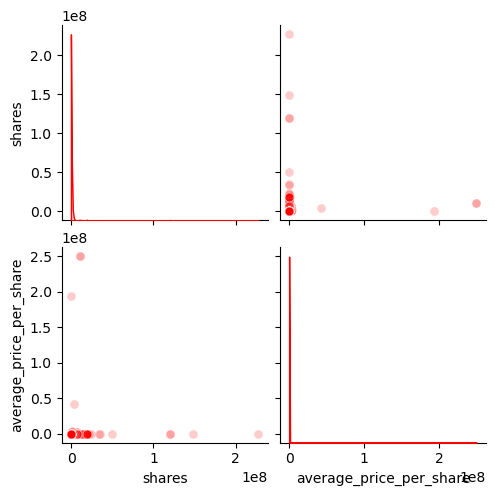

In [129]:
# Let's start by looking at some of the variables
features = ["shares", "average_price_per_share"]


def create_splom(df, features):
    sns.pairplot(
        df[features],
        diag_kind="kde",
        plot_kws={"alpha": 0.2, "s": 40, "color": "red"},
        diag_kws={"alpha": 0.2, "fill": True, "color": "red"},
    )
    plt.show()


create_splom(cs_df, features)

## Part 2: Abnormal Share Data
Okay, clearly we have some extremely large values indicated by the log scale and the significantly right skewed distribution. The first thing we want to do is look for outliers or data that may not be accurate. Let's take a look at this visually and inspect any entry where we have over 50,000 shares.

In [130]:
# Let's create a function to easily create histograms for our features
def create_histogram(
    df: pd.DataFrame,
    feature: str,
    bins: int = 20,
    bin_range: tuple[int, int] | None = None,
):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, bins=bins, binrange=bin_range)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")
    plt.show()

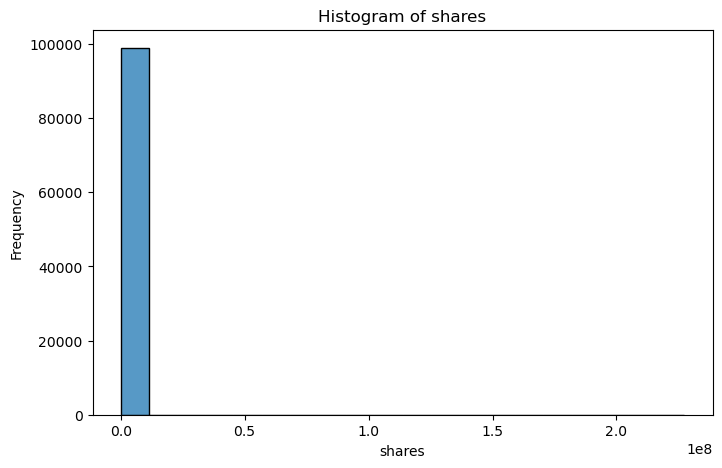

In [131]:
create_histogram(cs_df, feature="shares")

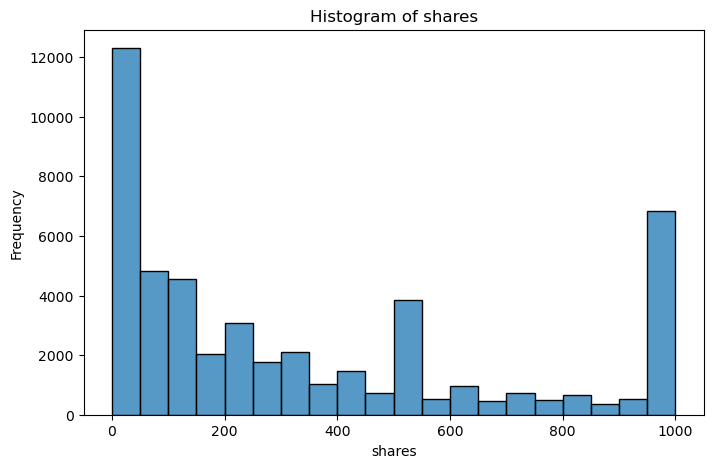

In [132]:
create_histogram(cs_df, "shares", 20, (0, 1000))

In [133]:
large_share_df = cs_df[cs_df["shares"] > 50000]
print(large_share_df.shape)
large_share_df[["Ticker", "average_price_per_share", "shares", "total_capital"]].head()

(6513, 61)


,Ticker,average_price_per_share,shares,total_capital
131,CCI,13.301709,2500000.0,33254272.80
132,CCI,13.678800,2000000.0,27357600.00
134,ABG,43.270000,113270.0,4901192.90
137,BNED,10.720000,166060.0,1780163.20
138,BNED,8.660000,288927.0,2502107.82


Okay, some of these values seem excessive but we cannot discount the fact that some insiders may be investing this much capital. It is something we will take note of and keep an eye out for. However, they may be filtered out as we go.

## Part 3: Transaction and Period of Report Date Abnormalities
Another thing that we may want to check is the transaction dates. As these are all manually entered, there is a lot of room for errors and mistakes. Let's start by looking at the min and max date (which we saw earlier in our descriptive info) to point out the issue. Our max date should be good because of our earlier filtering of the data that didn't have 6 month price data.

In [134]:
min_date = pd.to_datetime(cs_df["Transaction Date"], format="%d-%b-%Y").min()
max_date = pd.to_datetime(cs_df["Transaction Date"], format="%d-%b-%Y").max()
print(f"The min date is {min_date}")
print(f"The max date is {max_date}")

The min date is 1993-05-19 00:00:00
The max date is 2024-12-10 00:00:00


We can see that the minimum date is much earlier than the Q1-2006 report date that we are starting with. It may be easier to inspect these visually. Let's see if it would be a good idea to limit these transactions to between 01-01-2006 and 03-31-2025 (End of Q1).

In [135]:
def create_date_scatterplot(df: pd.DataFrame, x: str, y: str):
    # Adjust dates to explicity get the right format
    df[x] = pd.to_datetime(df[x], format="%d-%b-%Y")
    df[y] = pd.to_datetime(df[y], format="%d-%b-%Y")
    # Plot the dates for comparison
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, color="orange", alpha=0.2)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"Comparing {x} and {y}")
    plt.show()


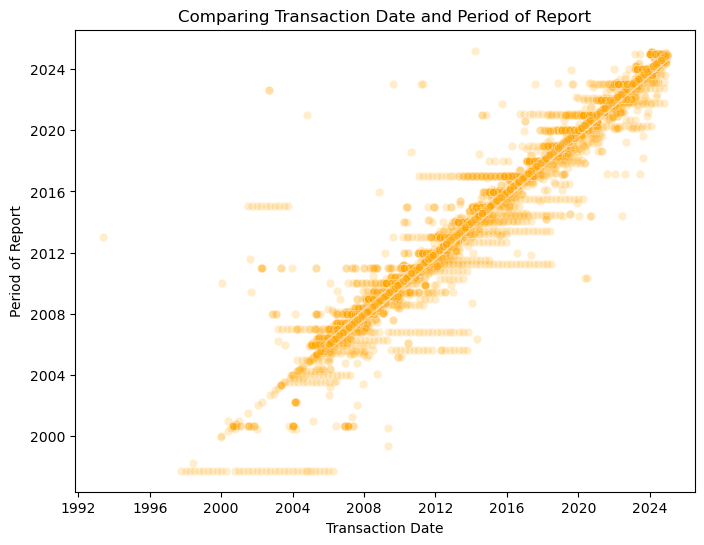

In [136]:
create_date_scatterplot(cs_df, "Transaction Date", "Period of Report")


There are clearly many values where the period and the report date are incorrect. So let's go ahead and filter this data down to transactions that occured in our expected timeframe.

In [137]:
filtered_date = cs_df[
    (
        pd.to_datetime(cs_df["Transaction Date"], format="%d-%b-%Y")
        >= pd.to_datetime("01-01-2006")
    )
    & (
        pd.to_datetime(cs_df["Transaction Date"], format="%d-%b-%Y")
        <= pd.to_datetime("03-31-2025")
    )
].copy()
filtered_date = filtered_date[
    (
        pd.to_datetime(filtered_date["Period of Report"], format="%d-%b-%Y")
        >= pd.to_datetime("01-01-2006")
    )
    & (
        pd.to_datetime(filtered_date["Period of Report"], format="%d-%b-%Y")
        <= pd.to_datetime("03-31-2025")
    )
].copy()

filtered_date.shape

(98177, 61)

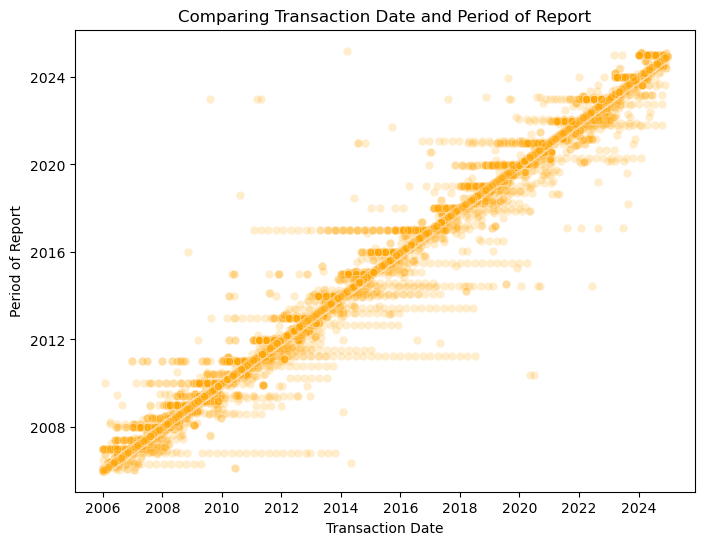

In [138]:
create_date_scatterplot(filtered_date, "Transaction Date", "Period of Report")


That looks much better.

## Part 4: Price Data and Transaction Date Inaccuracies
Again, because this data is filled out by the individual, there is a lot of potential for mistakes. I think another thing we should look at to confirm the accuracy of the data is whether the price purchased falls within the price traded on the transaction date (high and low of the stock). Quikcly looking at the min and max of the average price per share, we can see clearly that there are some incorrect values. First let's filter the data by a minimum capital investment of $10,000. This helps imply confidence in the underlying asset and should filter out small repetive investments as part of an investing strategy.

In [139]:
print(
    f"The number of transactions before removing capital over $10,000 {filtered_date.shape[0]}"
)
filtered_date = filtered_date[filtered_date["total_capital"] >= 10000.0]
print(
    f"The number of transactions after removing capital over $10,000 {filtered_date.shape[0]}"
)
min_price_per_share = filtered_date["average_price_per_share"].min()
max_price_per_share = filtered_date["average_price_per_share"].max()
print(f"Min price: {min_price_per_share}; Max price: {max_price_per_share}")

The number of transactions before removing capital over $10,000 98177
The number of transactions after removing capital over $10,000 62643
Min price: 5.0; Max price: 250000000.0


Now, we need to address the higher end of the price data. It seems as though we have a few prices that are just way too high, in the order of hundereds of millions per share. We can easily catch these by looking at any stock price that is over $100,000 per share.

In [140]:
filtered_date[filtered_date["average_price_per_share"] == 250000000].iloc[:, :15]

,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,Ownership Type,ACCESSION_NUMBER,shares,price_per_share,shares_after
76363,ROSS WILBUR L JR,Missing,Tenpercentowner,ASSURED GUARANTY LTD,AGO,1273813,2008-02-28,2008-04-08,Common Stock,P,I,0001181431-08-024363,10651896.0,250000000.0,12166396.0
76364,ROSS WILBUR L JR,Missing,Tenpercentowner,ASSURED GUARANTY LTD,AGO,1273813,2008-02-28,2008-04-08,Common Stock,P,I,0001181431-08-030008,10651896.0,250000000.0,12166396.0


The cost of this stock is clearly wrong, let's see if this was an issue with my aggregation or if it was an issue in the original Form4 records. We will pull in our original dataset for comparison.

In [141]:
# Read in the .csv file
orig_df = pd.read_csv("notebook1_insider_data.csv")
print(f"Let's take a look at the size of our dataframe: {orig_df.shape}\n")
# print(cs_df.head())

ago_df = orig_df[orig_df["Ticker"] == "AGO"]
ago_df.shape
ago_df.iloc[:, 7:13]

Let's take a look at the size of our dataframe: (309585, 15)



,Transaction Date,Security,Transaction Code,Shares,Price per Share,Shares After
16625,09-AUG-2006,Common Stock,P,5000.0,2.489000e+01,12795.26
69318,04-MAR-2008,Common Stock,P,10000.0,2.666000e+01,19970.85
90430,08-APR-2008,Common Stock,P,10651896.0,2.500000e+08,12166396.00
93130,08-APR-2008,Common Stock,P,10651896.0,2.500000e+08,12166396.00
114322,24-JUN-2009,Common Stock,P,3850000.0,4.235000e+07,16023984.00
144275,25-AUG-2011,Common Stock,P,6690.0,1.195000e+01,17371186.00
144469,22-AUG-2011,Common Stock,P,50000.0,1.133000e+01,16961996.00
144470,24-AUG-2011,Common Stock,P,80000.0,1.188000e+01,17364496.00
144471,23-AUG-2011,Common Stock,P,322500.0,1.161000e+01,17284496.00
144799,19-AUG-2011,Common Stock,P,120000.0,1.153000e+01,16911996.00


So unfortunately, it looks like these are inaccurate reports of price per share it was actually around $25 a share, not 250000000 in April of 2008. In Jun of 2009, the stock was still in the high teens low 20's so I have no idea where the 4.23e8 came from. It is likely that our future analysis will remove these but we can just remove them now based on their index.


Let's take a look at all of the stocks that have over $100,000 average price per share and after that we can narrow down the stocks that have a significant difference between the average price on the date of transaction and the average price per share.

In [142]:
high_price_df = filtered_date[filtered_date["average_price_per_share"] > 100000]
indexes = list(high_price_df.index)
print(high_price_df.shape)
high_price_df[
    [
        "Ticker",
        "Transaction Date",
        "average_price_per_share",
    ]
].head()

(36, 61)


,Ticker,Transaction Date,average_price_per_share
2732,INVA,2010-04-30,143000.0
5204,NXPL,2022-12-14,1899999.5
9851,PEFF,2006-11-30,300000.0
9852,PEFF,2006-11-30,300000.0
15407,NOEC,2010-09-28,938496.0


A quick look at these prices on the date of transaction versus the average price per share clearly shows abnormal data.

There are two ways we can now address price inaccuracies on the transaction date. One is looking at whether the transaction price falls within the high and low of the price of the stock on the transaction date (preferred), the other is to filter the dataset with transactions that fall within 5% of the average trade price for the date of the transaction. The benefit to the later is that it may catch transaction dates that are only off by a day or two where as the former will be specific only to those that likely occured on the reproted transaction date. However, the former will likely lead to more accurate conclusions, so we will  move forward with this.


In [143]:
# Let's see what the average price was on the date of transaction
average_price = filtered_date.copy()
average_price["avg_transactiondate"] = (
    average_price["transactiondate_high"] + average_price["transactiondate_low"]
) / 2

In [144]:
def create_scatterplot(df: pd.DataFrame, x: str, y: str, title: str | None = None):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, color="orange", alpha=0.2)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    if title == None:
        plt.title(f"{x} vs {y}")
    else:
        plt.title(title)
    plt.show()

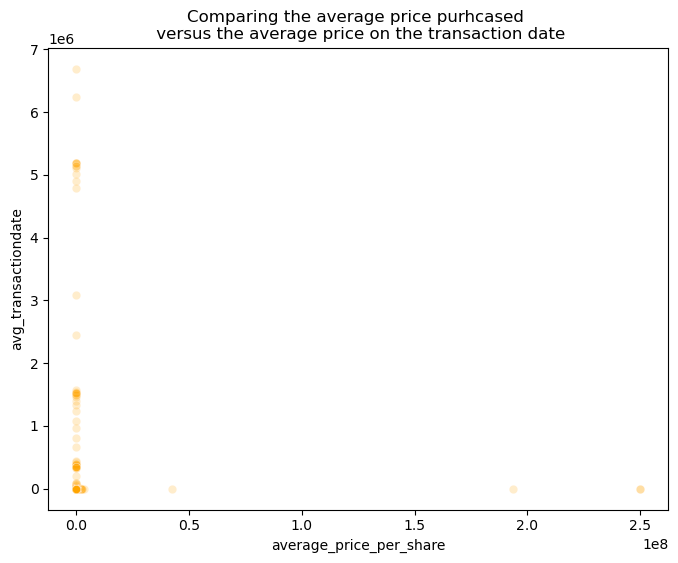

In [145]:
# Let's plot the average purchase price vs the avg price on transaction date
create_scatterplot(
    average_price,
    "average_price_per_share",
    "avg_transactiondate",
    title="Comparing the average price purhcased \n versus the average price on the transaction date",
)

Alright, this scatter plot is pretty striking. There is a lot of density around 0.0,0.0 which is to be expected when we have log scales on both axis. Clearly, it looks like some of these stock prices are wrong, as I doubt anyone is paying on the order of 250000000 for 1 share. Let's filter by purchase prices that fall within the high and low of trading on the transaction date and look again.

In [146]:
orig_len = average_price.shape[0]
print(f"Originally we had {orig_len} transcations")
# Let's create a dataframe filtered by prices falling within the high and low
high_low_df = average_price[
    (average_price["average_price_per_share"] <= average_price["transactiondate_high"])
    & (average_price["average_price_per_share"] >= average_price["transactiondate_low"])
].copy()

new_len = high_low_df.shape[0]
print(f"Now we have {new_len} transactions")
print(
    f"There are only {np.round(new_len / orig_len * 100, 1)}% of transactions that likely occured on the actual reported transaction date"
)

Originally we had 62643 transcations
Now we have 19302 transactions
There are only 30.8% of transactions that likely occured on the actual reported transaction date


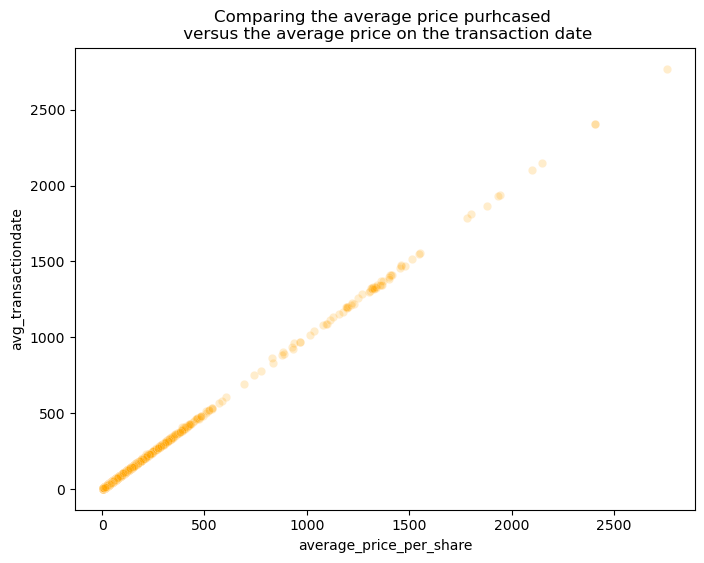

In [147]:
create_scatterplot(
    high_low_df,
    "average_price_per_share",
    "avg_transactiondate",
    title="Comparing the average price purhcased \n versus the average price on the transaction date",
)

In [148]:
# Let's look at the shape of our data
print(high_low_df.shape)
# How many unique insider titles do we have?
print(len(high_low_df["Insider Title"].unique()))
# Let's look at the top 10
print(high_low_df["Insider Title"].value_counts()[:10])

(19302, 62)
953
Insider Title
Missing                    12753
Chief Executive Officer      833
CEO & Chairman               702
President and CEO            542
Chief Financial Officer      363
President & CEO              349
CEO                          233
See Remarks                  170
President                    111
Chief Operating Officer       98
Name: count, dtype: int64


Okay, this dramatically reduced our data set but at least it is more likely to be an accurate analysis. We still have a few hundered of the biggest insider titles

## Part 5: Outlier Checks
Let's recheck with the splom graph from earlier and take a look at price data for any significant outliers over the course of the six months that we have price data.

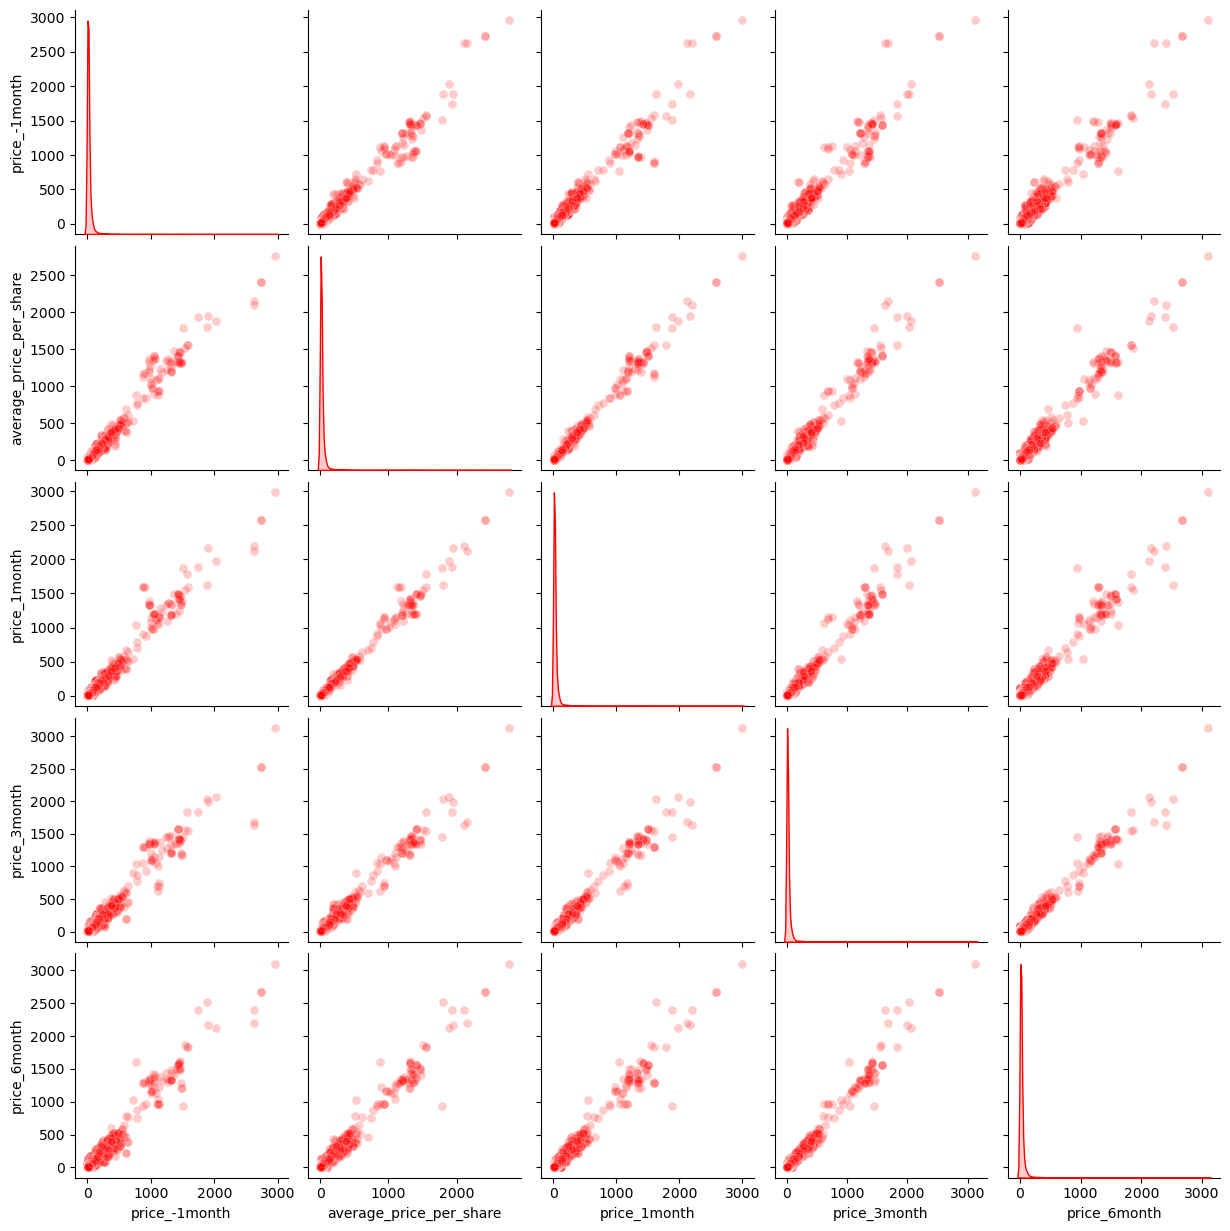

In [149]:
# Let's start by looking at the price variables which should show any outliers
features = [
    "price_-1month",
    "average_price_per_share",
    "price_1month",
    "price_3month",
    "price_6month",
]
create_splom(high_low_df, features)

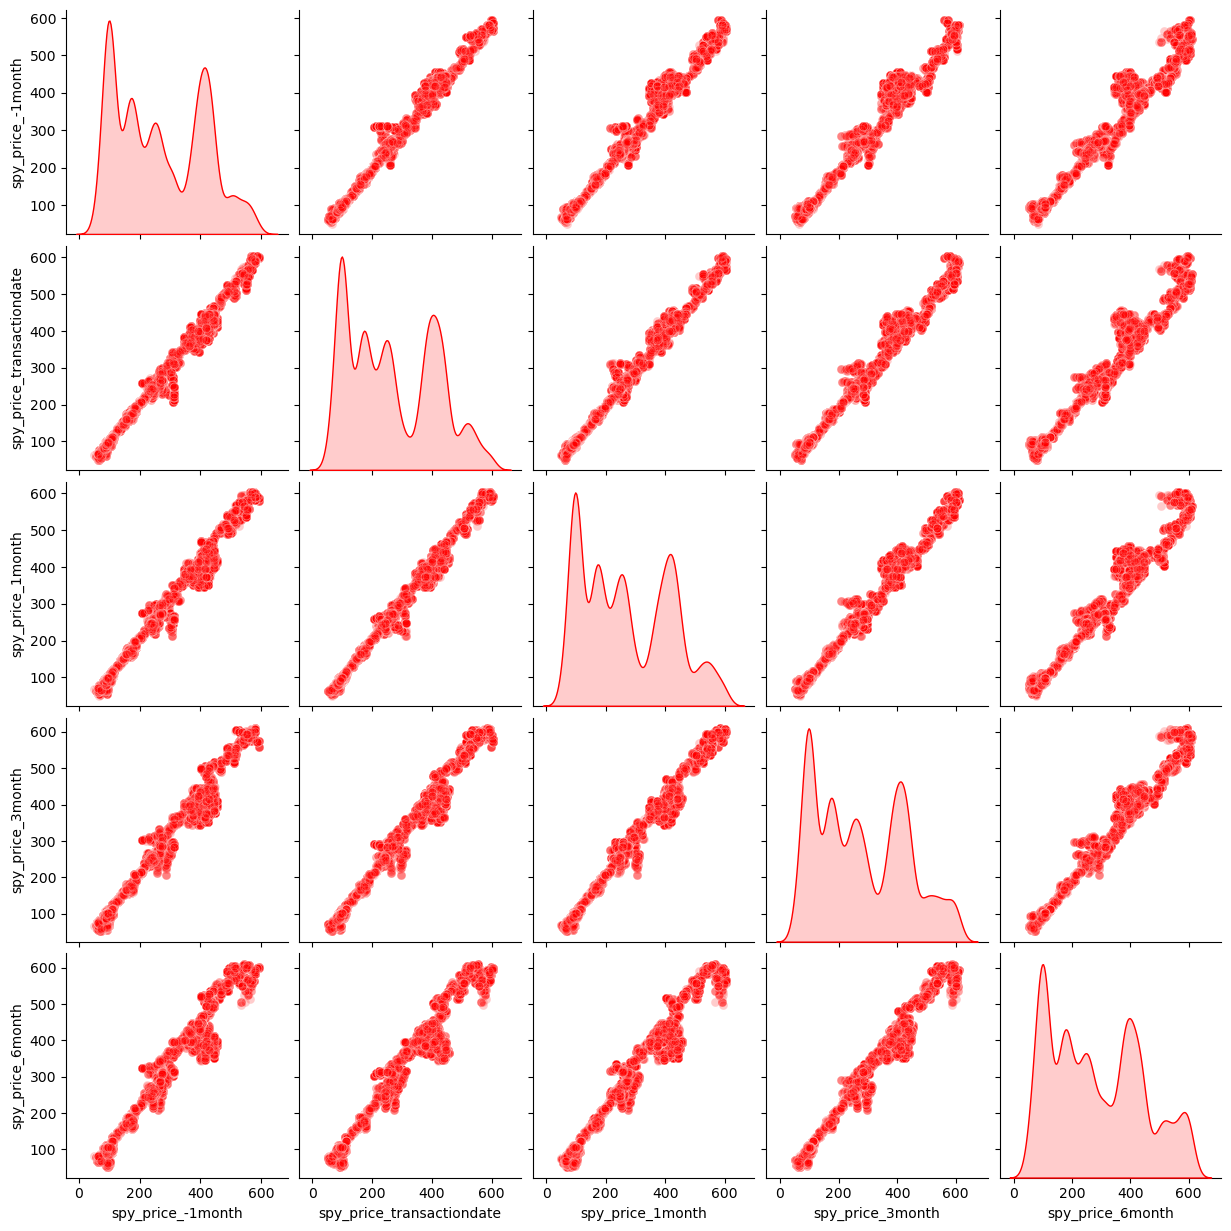

In [150]:
# Let's look at the spy price which also should show any outliers
features = [
    "spy_price_-1month",
    "spy_price_transactiondate",
    "spy_price_1month",
    "spy_price_3month",
    "spy_price_6month",
]
create_splom(high_low_df, features)

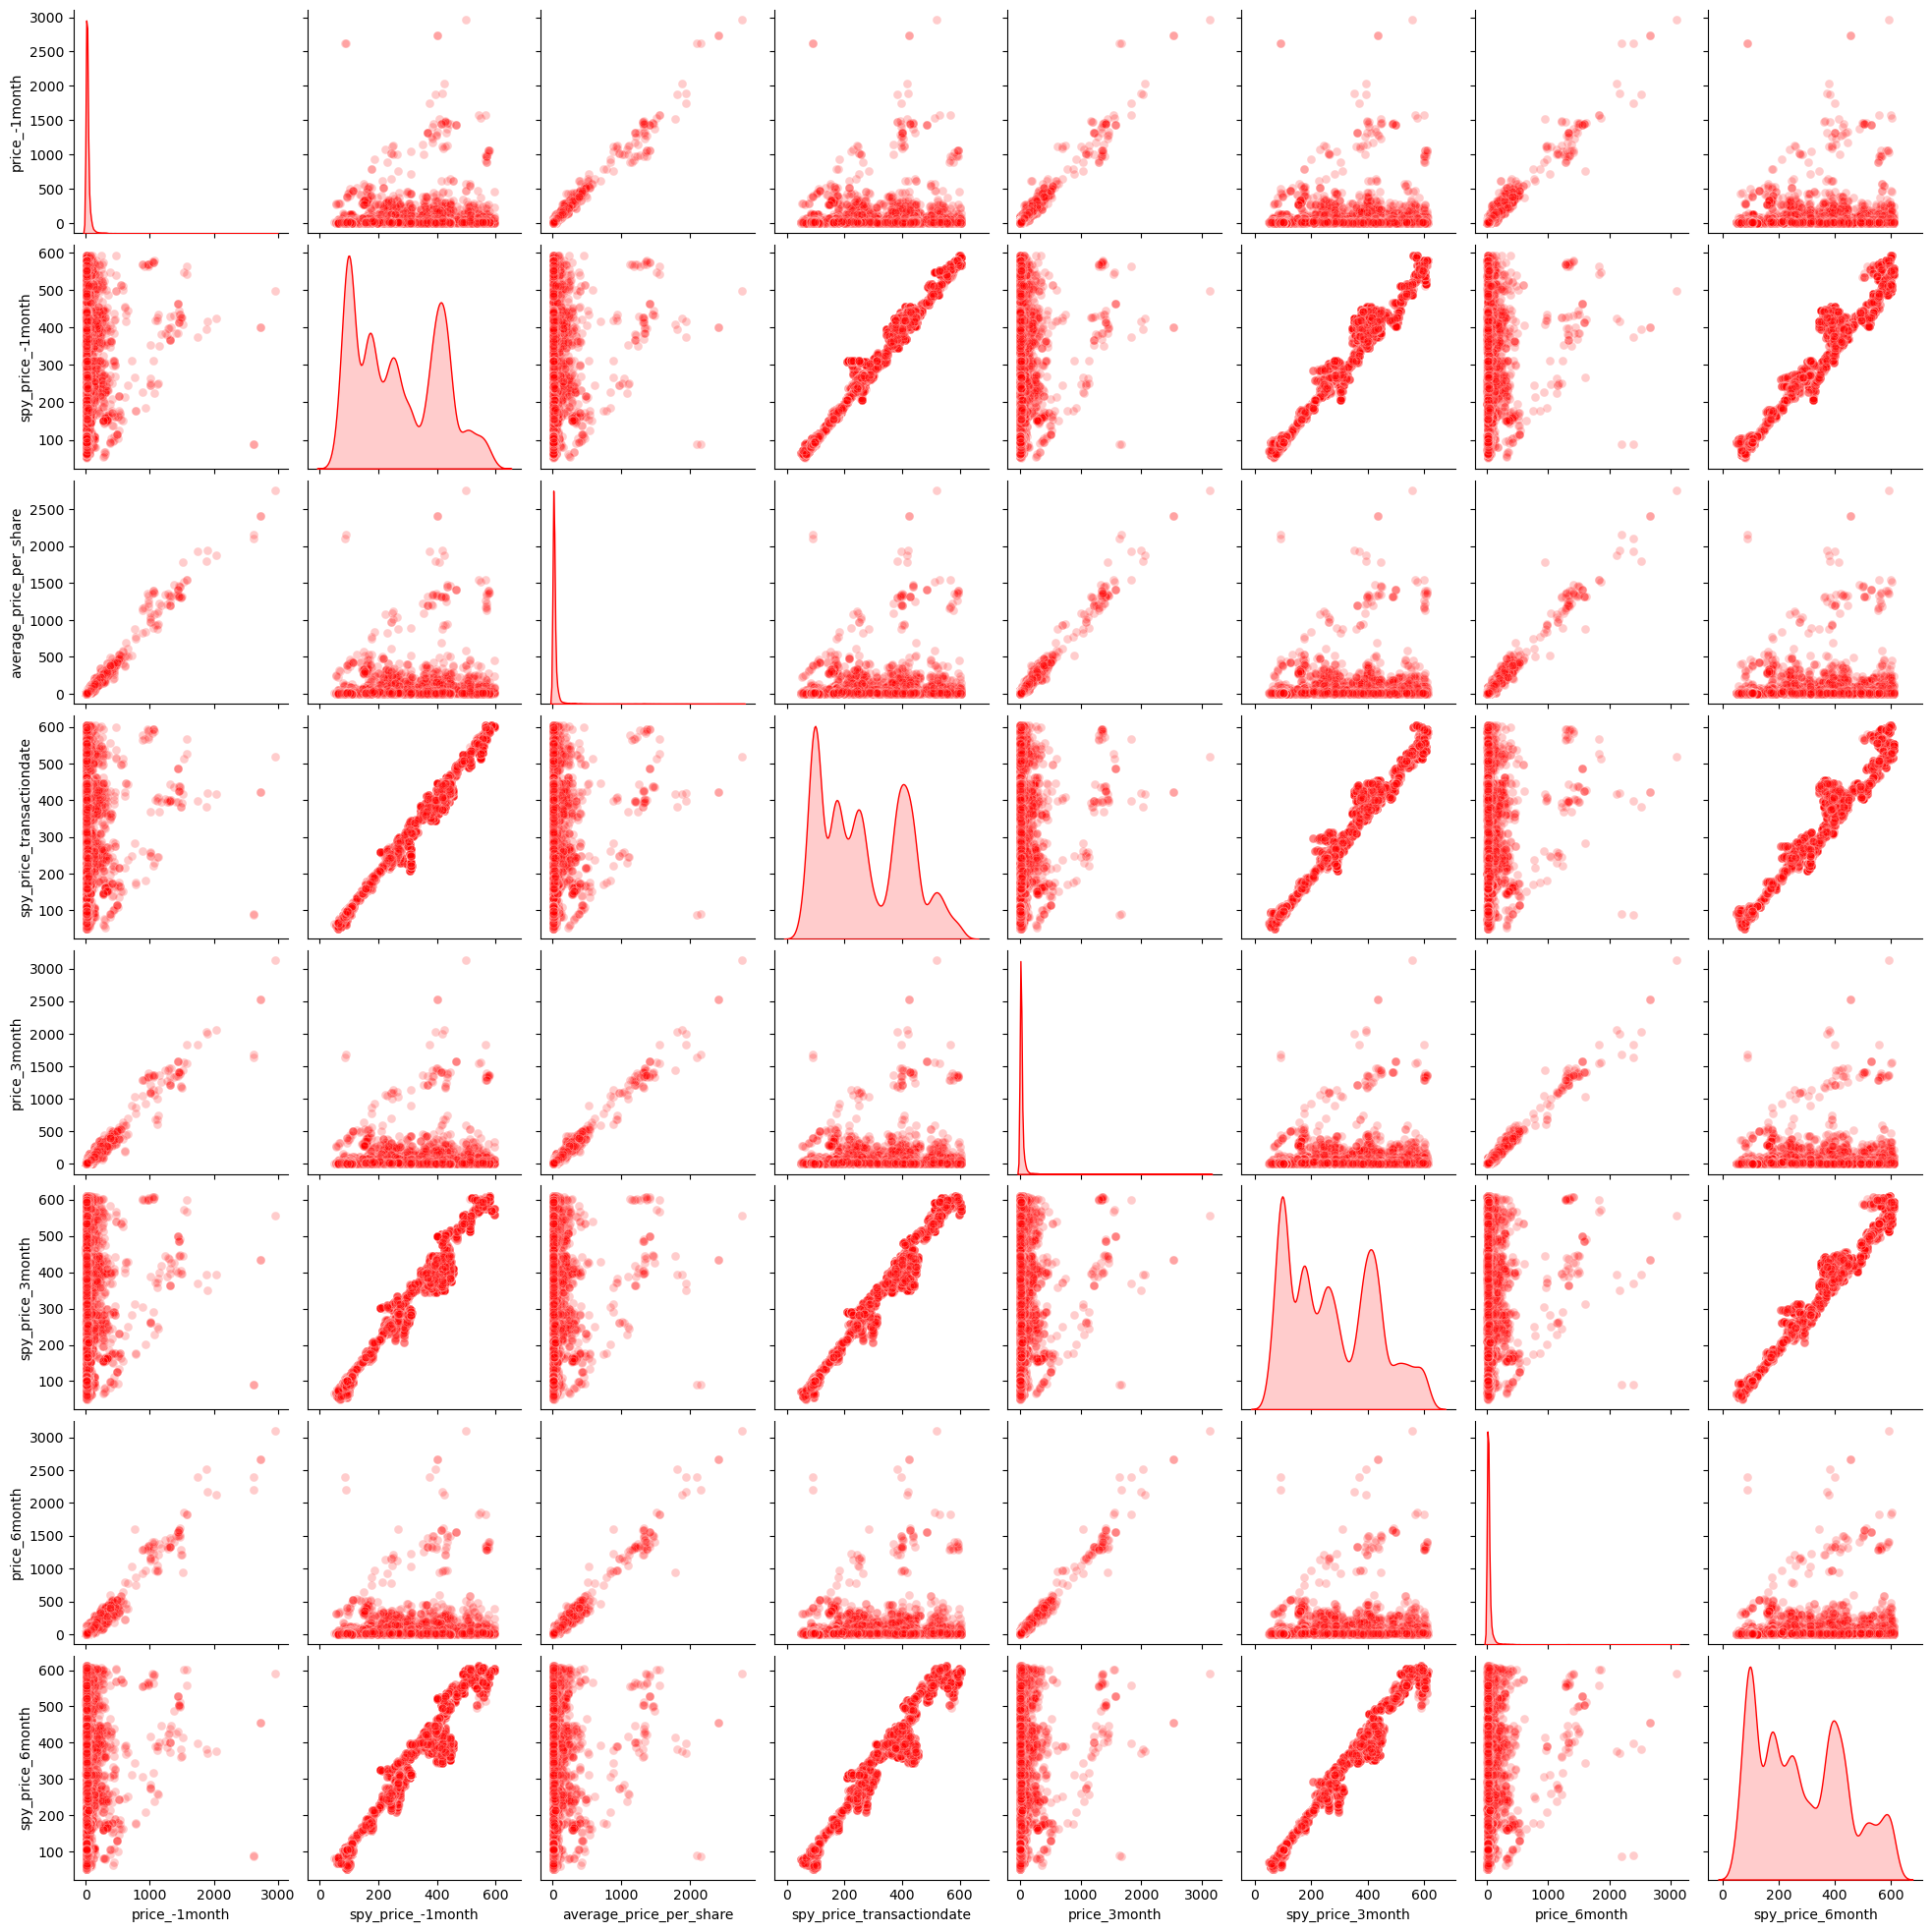

In [151]:
# Let's look at both together as well
features = [
    "price_-1month",
    "spy_price_-1month",
    "average_price_per_share",
    "spy_price_transactiondate",
    "price_3month",
    "spy_price_3month",
    "price_6month",
    "spy_price_6month",
]

create_splom(high_low_df, features)

Those look good and show the linear relationship over the six months like we expected. More importantly we can see price movements but no significant outliers.


## Part 6: Categorical Data - Insider Title and Insider Roles
I think the next natural step is to try and clear up the Insider Role and titles. Let's first look and see how many of the 'missing titles' have director in the 'Insider Role' section. Let's start by working with the 'Insider Role' Column as there are much less data points and options there. It will work as a proof of concept for the Insider title column.

In [152]:
missing_title = high_low_df[high_low_df["Insider Title"] == "Missing"]
print(missing_title.shape)
# Let's now look at the unique roles we have in here.
roles = missing_title["Insider Role"].unique()
print(f"There are {len(roles)} different roles that we need to work with")
roles

(12753, 62)
There are 10 different roles that we need to work with


array(['Director', 'Tenpercentowner', 'Directorother',
       'Director,Tenpercentowner', 'Director,Other',
       'Tenpercentownerother', 'Director,Tenpercentownerother',
       'Tenpercentowner,Other', 'Director,Tenpercentowner,Other',
       'Director,Officer,Tenpercentowner'], dtype=object)

Okay, the first thing we will need to do is split the information (most often by a comma) so we will address that first. We need to write a function that will split, rename, then rejoin. Then we can use dummies to easily filter the dataframes.

In [153]:
# Let's create a map for the roles to be replaced
role_mapping = {
    "Director": "Director",
    "Tenpercentowner": "10%owner",
    "Tenpercentownerother": "10%owner,Other",
    "Other": "Other",
    "Directorother": "Director,Other",
}
mapped_role = missing_title.copy()


# Let's create a function that uses list comprehension and splits them, changes them, and rejoins them.
def mapping_roles(roles):
    role = [r.strip() for r in roles.split(",")]
    map_roles = [role_mapping.get(r, r) for r in role]
    return ",".join(map_roles)


# Apply our new function to a new column and take a look
mapped_role["Mapped Roles"] = mapped_role["Insider Role"].apply(mapping_roles)
roles = mapped_role["Mapped Roles"].unique()

print(f"The new number of roles is {len(roles)}")
roles

The new number of roles is 7


array(['Director', '10%owner', 'Director,Other', 'Director,10%owner',
       '10%owner,Other', 'Director,10%owner,Other',
       'Director,Officer,10%owner'], dtype=object)

Okay, now that we have cleaned this up, we can one hot encode this by using the get_dummies method in pandas.

In [154]:
role_dummies = mapped_role["Mapped Roles"].str.get_dummies(sep=",")
full_df = pd.concat([mapped_role, role_dummies], axis=1)
full_df.head()

,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,...,fifty_two_week_high,fifty_two_week_low,company_name,market_cap_category,avg_transactiondate,Mapped Roles,10%owner,Director,Officer,Other
23,ABBATECOLA VINCENT P,Missing,Director,HUDSON TECHNOLOGIES INC /NY,HDSN,925528,2024-11-07,2024-11-07,Common Stock,P,...,9.54,5.11,"Hudson Technologies, Inc.",Small cap ($0 - $2B),5.830000,Director,0,1,0,0
25,ABBATECOLA VINCENT P,Missing,Director,HUDSON TECHNOLOGIES INC /NY,HDSN,925528,2017-12-15,2017-12-17,Common Stock,P,...,9.54,5.11,"Hudson Technologies, Inc.",Small cap ($0 - $2B),5.800000,Director,0,1,0,0
57,ABERCROMBIE GEORGE B,Missing,Director,BIOCRYST PHARMACEUTICALS INC,BCRX,882796,2013-11-12,2013-11-12,Common Stock,P,...,11.31,5.92,"BioCryst Pharmaceuticals, Inc.",Mid Cap ($2B - $10B),5.965000,Director,0,1,0,0
58,ABERNATHY ROBERT E,Missing,Director,HAEMONETICS CORP,HAE,313143,2020-08-11,2020-08-11,Common Stock,P,...,94.99,55.30,Haemonetics Corporation,Mid Cap ($2B - $10B),80.070000,Director,0,1,0,0
134,ABRAMS DAVID C,Missing,Tenpercentowner,ASBURY AUTOMOTIVE GROUP INC,ABG,1144980,2020-03-18,2020-03-18,Common Stock,P,...,312.56,201.68,"Asbury Automotive Group, Inc.",Mid Cap ($2B - $10B),43.184999,10%owner,1,0,0,0


Now, we can look at whoever we want based on the roles that they have. We can look at the average return of Directors by filtering the dataframe and then using a scatter plot.

In [155]:
# Let's create a base function for our scatter plots where we can just add some dynamic variables
def create_comparison_scatterplot(
    df1: pd.DataFrame,
    df2: pd.DataFrame,
    x: str,
    y: str,
    pos1: str,
    pos2: str,
    title: str | None = None,
):
    # Let's Look at Directors vs. 10% Owners
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df1,
        x=x,
        y=y,
        alpha=0.2,
        label=pos1,
    )
    sns.scatterplot(
        data=df2,
        x=x,
        y=y,
        alpha=0.2,
        color="red",
        label=pos2,
    )

    # Let's put in a 45degree line to show break even
    ax = plt.gca()
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    plt.plot(lims, lims, linestyle="--", color="gray", linewidth=1)

    # Lets give it an annotation
    x_text = lims[0] + 0.85 * (lims[1] - lims[0])
    y_text = x_text
    plt.text(
        x_text,
        y_text,
        "Break-even",
        ha="left",
        va="bottom",
        fontsize=10,
        color="gray",
        backgroundcolor="white",
        alpha=0.7,
    )

    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    if title == None:
        plt.title(f"{x} vs {y}")
    else:
        plt.title(title)
    plt.show()

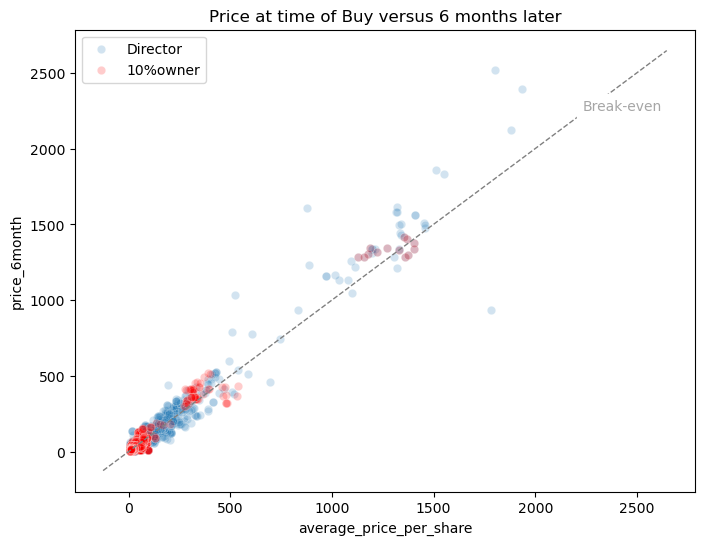

In [156]:
title = "Price at time of Buy versus 6 months later"
dir_df = full_df[full_df["Director"] == 1]
own_df = full_df[full_df["10%owner"] == 1]

create_comparison_scatterplot(
    dir_df,
    own_df,
    "average_price_per_share",
    "price_6month",
    "Director",
    "10%owner",
    title=title,
)

We now need to apply this to our large dataframe as this was only a small proof of concept dataframe based on those that had 'missing' titles. Let's start with the full high_low_df.

In [157]:
# Let's now look at the unique roles we have in here.
roles = high_low_df["Insider Role"].unique()
print(f"There are {len(roles)} different roles that we need to work with")
roles

There are 18 different roles that we need to work with


array(['Director', 'Officer', 'Tenpercentowner', 'Director,Officer',
       'Directorother', 'Director,Officer,Tenpercentowner',
       'Director,Tenpercentowner', 'Director,Other',
       'Tenpercentownerother', 'Director,Officer,Other',
       'Director,Officerother', 'Director,Tenpercentownerother',
       'Officerother', 'Director,Officer,Tenpercentowner,Other',
       'Director,Officer,Tenpercentownerother', 'Officer,Tenpercentowner',
       'Tenpercentowner,Other', 'Director,Tenpercentowner,Other'],
      dtype=object)

In [158]:
# Let's confirm the shape of our original dataframe
print(f"Shape of our df originally: {high_low_df.shape}")
# Create a copy in order to map the roles
role_mapped = high_low_df.copy()
# Using the unique info above let's create our mapping dictionary
role_mapping = {
    "Director": "Director",
    "Tenpercentowner": "10%owner",
    "Officer": "Officer",
    "Other": "Other",
    "Director,Officer,Tenpercentownerother": "Director,Officer,10%owner,Other",
    "Director,Officerother": "Director,Officer,Other",
    "Director,Tenpercentownerother": "Director,10%owner,Other",
    "Tenpercentownerother": "10%owner,Other",
    "Officerother": "Officer,Other",
    "Directorother": "Director,Other",
}


# Let's create a function that splits them changes them and rejoins them
def mapping_roles(roles):
    role = [r.strip() for r in roles.split(",")]
    map_roles = [role_mapping.get(r, r) for r in role]
    return ",".join(map_roles)


# Let's apply it to the dataframe and create a new column
role_mapped["Mapped Roles"] = role_mapped["Insider Role"].apply(mapping_roles)
roles = role_mapped["Mapped Roles"].unique()
print(f"Now the shape is {role_mapped.shape}")
print(f"The new number of roles is {len(roles)}")
roles

Shape of our df originally: (19302, 62)
Now the shape is (19302, 63)
The new number of roles is 13


array(['Director', 'Officer', '10%owner', 'Director,Officer',
       'Director,Other', 'Director,Officer,10%owner', 'Director,10%owner',
       '10%owner,Other', 'Director,Officer,Other',
       'Director,10%owner,Other', 'Officer,Other',
       'Director,Officer,10%owner,Other', 'Officer,10%owner'],
      dtype=object)

In [159]:
# Excellent, let's one hot encode the whole thing now and take a look at the new shape
role_dummies = role_mapped["Mapped Roles"].str.get_dummies(sep=",")
role_dummies = pd.concat([role_mapped, role_dummies], axis=1)
print(role_dummies.shape)
role_dummies.head()

(19302, 67)


,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,...,fifty_two_week_high,fifty_two_week_low,company_name,market_cap_category,avg_transactiondate,Mapped Roles,10%owner,Director,Officer,Other
23,ABBATECOLA VINCENT P,Missing,Director,HUDSON TECHNOLOGIES INC /NY,HDSN,925528,2024-11-07,2024-11-07,Common Stock,P,...,9.54,5.110,"Hudson Technologies, Inc.",Small cap ($0 - $2B),5.8300,Director,0,1,0,0
25,ABBATECOLA VINCENT P,Missing,Director,HUDSON TECHNOLOGIES INC /NY,HDSN,925528,2017-12-15,2017-12-17,Common Stock,P,...,9.54,5.110,"Hudson Technologies, Inc.",Small cap ($0 - $2B),5.8000,Director,0,1,0,0
54,ABENDSCHEIN ROBERT D.,See Remarks,Officer,TALOS ENERGY INC.,TALO,1724965,2020-08-11,2020-08-11,Common Stock,P,...,12.71,6.225,Talos Energy Inc.,Small cap ($0 - $2B),8.3300,Officer,0,0,1,0
55,ABENDSCHEIN ROBERT D.,See Remarks,Officer,TALOS ENERGY INC.,TALO,1724965,2021-11-19,2021-11-19,Common Stock,P,...,12.71,6.225,Talos Energy Inc.,Small cap ($0 - $2B),9.7215,Officer,0,0,1,0
56,ABENDSCHEIN ROBERT D.,See Remarks,Officer,TALOS ENERGY INC.,TALO,1724965,2021-11-19,2021-11-19,Common Stock,P,...,12.71,6.225,Talos Energy Inc.,Small cap ($0 - $2B),9.7215,Officer,0,0,1,0


We have now had the proof of concept for the smaller 'Insider Role' Column. Now we have to deal with the really large 'Insider Title' Column. This is a much larger number of roles with enormous variation that we will have to deal with, so we will use a replace method to demonstrate our skills. This is going to likely take many repetitions in order to get every title that we need to do (after completing this, I realized it may have been a better idea to use a .lower() method to reduce some of the workload but I had already completed it). So let's start by looking at the value counts and working our way through them.

Let's keep track of any of the accronyms that I am using:  
- CEO: Chief Executive Officer  
- CEOi: Interim Chief Executive Officer
- CEOc: Co-Chief Executive Officer
- CFO: Chief Financial Officer
- CFOi: Interim Chief Financial Officer
- CAO: Chief Accounting Officer
- CDeO: Chief Development Officer
- PAO: Principal Accounting Officer
- CAdO: Chief Administration Officer
- CA: Chief Architect
- CGO: Chief Growth Officer
- CIO: Chief Information Officer
- CInO: Chief Innovation Officer
- CPO: Chief Procurment Officer
- CInvO: Chief Investment Officer
- CHrO: Chief Human Resources Officer
- CCuO: Cheif Customer Officer
- CDO: Chief Digital Officer
- CCoO: Chief Compliance Officer
- CConO: Chief Concept Officer
- CClO: Chief Clinical Officer
- CSCO: Chief Supply Chain Officer
- CMeO: Chief Medical Officer
- CMerO: Chief Merchandising Officer
- CMO: Chief Marketing Officer
- CLO: Chief Legal Officer
- CLeO: Chief Lending Officer
- COO: Chief Operating Officer
- COOc: Co-Chief Operating Officer
- CSO: Chief Strategy Officer
- CSaO: Chief Sales Officer
- CScO: Chief Scientific Officer
- CCO: Chief Commercial Officer
- CCrO: Chief Credit Officer
- CQO: Chief Quality Offier
- CTO: Chief Technology Officer
- CTaO: Chief Talent Officer
- CRO: Chief Risk Officer
- CReO: Chief Revenue Officer
- CRDO: Chief Research and Development Officer
- CPO: Chief People Officer
- CPrO: Chief Product Officer
- CBO: Chief Business Officer
- CBaO: Chief Banking Officer
- CBrO: Chief Broker Officer
- CIDO: Chief International Development Officer
- EVP: Executive Vice President  
- SVP: Senior Vice President
- SLO: Senior Loan Officer
- F: Founder
- P: President
- Pc: Co-President
- Pf: Former President
- Pi: Interim President
- VP: Vice President
- VPf: Vice President of Finance
- EC: Executive Chairman
- C: Chairman
- VC: Vice Chairman
- DC: Deputy Chairman
- D: Director
- DR: Director of Research
- DT: Director of Technology
- GC: General Counsel
- O: Operations
- S: Corporate Secretary
- T: Treasurer
- FS: Financial Services
- DRRM: Director of Regulatory Risk Management
- HFD: Head of Fund Development
- HAS: Head of Advisor Services
- HSBL: Head of Small Business Lending
- HCL: Head of Commercial Lending
- HRD: Head of Reserach and Development
- HPS: Head of Payment Solutions
- HOI: Head of Investments
- HCB: Head of Commercial Banking
- HRB: Head of Retail Banking
- HCD: Head of Corporate Development
- HMA: Head of Mergers and Aquisitions
- HAI: Head of Affiliate Investments
- HAE: Head of Affiliate Engagement
- SBD: Sales and Buisness Development
- Con: Controller
- GM: General Manager
- HR: Human Resources
- SMD: Senior Managing Director
- PEO: Professional Employer Organization
- PEOi: Interim Professional Employet Orginization
- MD: Managing Director


In [160]:
full_df = role_dummies.copy()
full_df["Insider Title"].value_counts()

replacements = {
    "Chief Executive Officer": "CEO",
    "CHIEF EXECUTIVE OFFICER": "CEO",
    "Chief Financial Officer": "CFO",
    "CHIEF FINANCIAL OFFICER": "CFO",
    "Chief Accounting Officer": "CAO",
    "Chief Administration Officer": "CAdO",
    "Chief Information Officer": "CIO",
    "Chief Innovation Officer": "CInO",
    "Chief Investment Officer": "CInvO",
    "Chief Medical Officer": "CMeO",
    "Chief Marketing Officer": "CMO",
    "Chief Operating Officer": "COO",
    "Chief Strategy Officer": "CSO",
    "Chief Legal Officer": "CLO",
    "Chief Business Officer": "CBO",
    "Chief Commercial Officer": "CCO",
    "Chief Technology Officer": "CTO",
    "Chief Human Resources Officer": "CHrO",
    "Chief Risk Officer": "CRO",
    "Executive Vice President": "EVP",
    "Senior Vice President": "SVP",
    "SVP OF INFORMATION TECHNOLOGY": "SVP",
    "President": "P",
    "PRESIDENT": "P",
    "Treasurer": "T",
    "Treasurer, Secretary": "T,S",
    "Group Vice President": "VP",
    "Vice President": "VP",
    "Vice President of Finance": "VPf",
    "Corporate Secretary": "S",
    "Director": "D",
    "Operations": "O",
    "Executive Chairman": "EC",
    "EXECUTIVE CHAIRMAN OF BOARD": "EC",
    "Chairman": "C",
    "Chairman of the Board": "C",
    "Vice Chairman": "VC",
    "President and CEO": "CEO,P",
    "CEO and President": "CEO,P",
    "PRESIDENT AND CEO": "CEO,P",
    "CEO & President": "CEO,P",
    "PRESIDENT & CEO": "CEO,P",
    "President, CEO": "CEO,P",
    "CEO/President": "CEO,P",
    "CEO, President": "CEO,P",
    "Chairman and CEO": "CEO,C",
    "Chairman/CEO": "CEO,C",
    "CEO and Chairman of the Board": "CEO,C",
    "Chairman, CEO": "CEO,C",
    "President and COO": "COO,P",
    "President & COO": "COO,P",
    "President & Treasurer": "P,T",
    "CFO & EVP": "CFO,EVP",
    "CFO and EVP": "CFO,EVP",
    "EVP and CFO": "CFO,EVP",
    "EVP & CFO": "CFO,EVP",
    "EVP & Chief Financial Officer": "CFO,EVP",
    "EVP, Chief Financial Officer": "CFO,EVP",
    "Executive VP and CFO": "CFO,EVP",
    "EVP, CFO": "CFO,EVP",
    "SVP & Chief Financial Officer": "CFO,SVP",
    "SVP & CFO": "CFO,SVP",
    "Chairman & CEO": "CEO,C",
    "Chairman, President & CEO": "CEO,P,C",
    "COB, CEO, President": "CEO,P,C",
    "Chairman, President and CEO": "CEO,P,C",
    "Chair. of the Board, Pres.,CEO": "CEO,P,C",
    "Chairman, CEO and President": "CEO,P,C",
    "President, Financial Services": "P,FS",
    "Executive VP, COO, and CFO": "CFO,COO,EVP",
    "COO, CFO and EVP": "CFO,COO,EVP",
    "Co-Chairman of the Board": "C",
    "President / CEO / Director": "CEO,P,D",
    "Chairman of the Board and CEO": "CEO,C",
    "CEO and Director": "CEO,D",
    "Vice Chairman & CTO": "CTO,VC",
    "Interim CEO": "CEOi",
    "Co-Chief Executive Officer": "CEOc",
    "EVP, DIRECTOR OF REG RISK MNGT": "EVP, DRRM",
    "VP, Head of Fund Development": "VP,HFD",
    "VP, Sales & Bus. Development": "VP,SBD",
    "CEO, Secretary, Treasurer": "CEO,T,S",
    "Pres. & CEO": "CEO,P",
    "CEO and CIO": "CEO,CIO",
    "SVP and CFO": "CFO,SVP",
    "EVP,Operations": "EVP,O",
    "General Counsel and Secretary": "GC,S",
    "EVP, CFO & Treasurer": "CFO,EVP,T",
    "See remarks": "See Remarks",
    "FOUNDER & CEO": "CEO,F",
    "CFO & Secretary": "CFO,S",
    "Sr. VP, Gen'l Counsel & Sec'y.": "SVP,GC,S",
    "SR EXEC VP OF SPECIAL PROJECTS": "SVP",
    "Vice President, Controller": "VP,Con",
    "General Counsel & Corp. Sec.": "GC,S",
    "EVP, COO and CFO": "CFO,COO,EVP",
    "EVP and COO": "COO,EVP",
    "Sr. VP Information Services": "SVP",
    "Sr. Vice President": "SVP",
    "CEO AND PRESIDENT": "CEO,P",
    "General Counsel": "GC",
    "EVP and CCO": "CCO,EVP",
    "Vice President of Operations": "VP",
    "Executive VP-Administration": "EVP",
    "Vice Chairman/Co CEO/President": "CEOc,P,VC",
    "EVP, Treasurer, Secretary, CFO": "CFO,T,S,EVP",
    "SVP, CFO AND TREASURER": "CFO,T,SVP",
    "Exec. VP and CFO": "CFO,EVP",
    "EVP Human Resources": "EVP",
    "Executive VP & COO": "COO,EVP",
    "Senior Vice President, CFO": "CFO,SVP",
    "COO & President": "COO,P",
    "VP & CFO": "CFO,VP",
    "EVP, CFO and Treasurer": "CFO,T,EVP",
    "Travelzoo GM, Germany": "GM",
    "VP, Human Resources": "VP,HR",
    "Chief Executive Officer & CTO": "CEO,CTO",
    "VP Finance and Adminisitration": "VP",
    "President and C.O.O.": "COO,P",
    "CFO, Treasurer & Secretary": "CFO,T,S",
    "EVP - HR (CHESI)": "EVP",
    "EVP, Chief Operating Officer": "COO,EVP",
    "EVP, President of Maggiano's": "EVP,P",
    "VP Finance and Administration,": "VP",
    "Exec. Vice President, Europe": "EVP",
    "General Counsel & Secretary": "GC,S",
    "President & CFO": "CFO,P",
    "Executive VP & CFO": "CFO,EVP",
    "VP and Secretary": "VP,S",
    "Sr. VP Finance, CFO": "CFO,SVP",
    "SVP, Chief Financial Officer": "CFO,SVP",
    "SVP, Chief Int'l Dev Ofc": "CIDO,SVP",
    "SVP, CFO & President-SBS": "CFO,P,SVP",
    "Senior VP & CFO": "CFO,SVP",
    "Chairman, Pres. & CEO": "CEO,P,C",
    "President, North America": "P",
    "CFO and Treasurer": "CFO,T",
    "SEVP & Chief Financial Officer": "CFO,SVP",
    "President, COO": "COO,P",
    "SVP & Chief Accounting Officer": "CAO,SVP",
    "VP Sales & Bus Development": "VP",
    "EVP & COO": "COO,EVP",
    "CEO,QCRH & CRBT": "CEO,QCRH,CRBT",
    "SVP, General Counsel": "GC,SVP",
    "EVP, General Counsel": "GC,EVP",
    "VP Finance & Admin CFO": "CFO,VP",
    "Chief Administrative Officer": "CAdO",
    "SVP, Executive Programs": "SVP",
    "Sr Vice President/Engineering": "SVP",
    "EVP, Chief HR Officer": "CHrO,EVP",
    "Director, President and CEO": "CEO,P,D",
    "President, CEO, COB": "CEO,P,C",
    "VP, Treasurer, Secretary & CFO": "CFO,T,S,VP",
    "Chairman, QCR Holdings": "C",
    "CEO of Bank Subsidiary": "CEO",
    "Corporate Controller": "Con",
    "EVP, Chief Information Officer": "CIO,EVP",
    "President, CEO, and CIO": "CEO,CIO,P",
    "President,": "P",
    "CAO & General Counsel": "CAO,GC",
    "Pres-Ampac Fine Chemicals LLC": "P",
    "President and CFO": "CFO,P",
    "Executive VP, CFO & Treasurer": "CFO,T,EVP",
    "Exec VP - Euprope,Asia & CPG": "EVP",
    "President, QCR Holdings": "P",
    "Secretary and General Counsel": "GC,S",
    "VP & Controller": "VP,Con",
    "Chairman of the Board/Co CEO": "CEOc,C",
    "VP Mktg & Strategic Planning": "VP",
    "President, R&D": "P",
    "EVP & GENERAL COUNSEL": "GC,EVP",
    "President, CEO, Chairman": "CEO,P,C",
    "President - CEO": "CEO,P",
    "Exec.V.P. and CFO, QCR Holding": "CFO,EVP",
    "VP- Customer Service": "VP",
    "Sr. VP, General Counsel": "GC,SVP",
    "Senior Vice President and CFO": "CFO,SVP",
    "President, Vista Staffing": "P",
    "President/CEO": "CEO,P",
    "EVP Strategy & Engagement": "EVP",
    "Chairmen": "C",
    "Exec VP, CFO & Treasurer": "CFO,T,EVP",
    "Sr. VP, General Counsel,": "GC,SVP",
    "Executive VP Finance & CFO": "CFO,EVP",
    "VP- Engineering": "VP",
    "V.P. & Senior Loan Officer": "SLO,VP",
    "EVP, Human Resources": "EVP",
    "SVP Finance & CFO": "CFO,SVP",
    "VP & Chief Financial Officer": "CFO,VP",
    "Pres., CEO & Chairman of Bd": "CEO,P,C",
    "President, CEO & Chairman": "CEO,P,C",
    "Deputy Chairman": "DC",
    "EVP/CFO": "CFO,EVP",
    "Exec VP - Europe, Asia & CPG": "EVP",
    "Vice President & Controller -": "VP,Con",
    "CEO and Chief Architect": "CEO,CA",
    "VP, Chief Commercial Officer": "CCO,VP",
    "Senior VP and CFO": "CFO,SVP",
    "Sr VP & GM Industrial Pro": "SVP",
    "SVP Commercial Sales": "SVP",
    "Executive VP of R&D": "EVP",
    "SVP, Chief Accounting Officer": "CAO,SVP",
    "PFO and PAO": "PFO,PAO",
    "CHAIRMAN OF THE BOARD": "C",
    "Controller": "Con",
    "Senior Vice President, Sales": "SVP",
    "Sr. VP and CFO": "CFO,SVP",
    "President, Subsidiary": "P",
    "Chief Customer Exper. Officer": "CCuO",
    "CFO and Executive VP": "CFO,EVP",
    "EVP, GC and Head of M&A": "GC,HMA",
    "Interim President & CEO": "CEOi,Pi",
    "Executive VP": "EVP",
    "Chief Legal Officer & VP": "CLO,VP",
    "Sr. VP, CFO and Treasurer": "CFO,T,SVP",
    "VP and Chief Financial Officer": "CFO,VP",
    "VP, Corporate Controller": "VP,Con",
    "EVP and Chief Credit Officer": "CCrO,EVP",
    "EVP, CHIEF INFORMATION OFFICER": "CIO,EVP",
    "Pres., Spacelabs Healthcare": "P",
    "Sr VP-Finance and CFO": "CFO,SVP",
    "Group VP, Golf, Grounds & Irr": "VP",
    "VP, Patient Advocacy": "VP",
    "Sr VP and CFO": "CFO,SVP",
    "Senior Vice President & CIO": "CIO,SVP",
    "SVP OF INFORMATION SYSTEMS": "SVP",
    "VP, Chief Financial Officer": "CFO,VP",
    "SVP of CommScope, Inc.": "SVP",
    "Chairman / CEO": "CEO,C",
    "Chief Supply Chain Officer": "CSCO",
    "EVP - Chief Financial Officer": "CFO,EVP",
    "EVP-Chief Operating Officer": "COO,EVP",
    "VP of IT Operations": "VP",
    "Chief Human Resource Officer": "CHrO",
    "Sr VP/Chief Commercial Officer": "CCO,SVP",
    "President, Mattress Fabrics": "P",
    "Chief People Officer": "CPO",
    "EVP Chief Admin Officer": "CAdO,EVP",
    "EVP, GEN COUNSEL & CORP SEC": "GC,S,EVP",
    "Sr. VP of Finance and CFO": "CFO,SVP",
    "President, Global Pharm. Div.": "P",
    "CFO, Treasurer": "CFO,T",
    "CEO - Oxford Global Resources": "CEO",
    "VP Finance and Controller": "VP,Con",
    "CHIEF INVESTMENT OFFICER": "CInvO",
    "Exec VP & COO": "COO,EVP",
    "SVP - Chief Financial Officer": "CFO,SVP",
    "VP Corp, Mktg & Strategy": "VP",
    "EVP (CHESI)": "EVP",
    "CEO, CFO": "CEO,CFO",
    "VP, Technical Operations": "VP",
    "Exec Chairman and Interim CEO": "CEOi,EC",
    "Pres. & Chief Comm. Officer": "CCO,P",
    "EVP, COO - Land, Legal & Admin": "COO,EVP",
    "SVP, General Counsel & Sec": "GC,S,SVP",
    "CFO & COO": "CFO,COO",
    "EVP, Chief Legal Officer": "CLO,EVP",
    "VP, Legal & IP": "VP",
    "VP, CFO & Treasurer": "CFO,T,VP",
    "VP & Chief Credit Officer": "CCrO,VP",
    "President, CEO and Director": "CEO,P,D",
    "VP and Corporate Controller": "VP,Con",
    "Executive Vice President -Asia": "EVP",
    "Vice-President": "VP",
    "President & C.E.O.": "CEO,P",
    "Co-Chairman & CEO": "CEO,C",
    "CEO, Chairman": "CEO,C",
    "President of Subsidiary": "P",
    "Sr. VP, GC & Secretary": "GC,S,VP",
    "EVP of Strategic Initiatives": "EVP",
    "SVP, Chief HR Officer": "CHrO,SVP",
    "EVP, CFO, Treasurer": "CFO,T,EVP",
    "Executive Vice President/CFO": "CFO,EVP",
    "Executive V.P. and CFO": "CFO,EVP",
    "SVP, Chief Legal Officer & Sec": "SLO,S,SVP",
    "Chief Scientific Officer": "CScO",
    "Executive VP Corporate Affairs": "EVP",
    "co-CEO": "CEOc",
    "COO, CFO, and EVP": "CFO,COO,EVP",
    "SVP and General Counsel": "GC,SVP",
    "VP, LOGISTICS/REAL ESTATE": "VP",
    "VP, Program Management": "VP",
    "CFO, Treasurer and Secretary": "CFO,T,S",
    "SVP, General Counsel & Secr.": "GC,S,SVP",
    "CFO, Sr VP": "CFO,SVP",
    "President, CEO & PFO": "CEO,P,PFO",
    "SVP, General Counsel & Sec.": "GC,S,SVP",
    "CFO & Exec. VP": "CFO,EVP",
    "EVP, Chief Product Officer": "CPrO,EVP",
    "Senior Vice President & CFO": "CFO,SVP",
    "Pres., CEO, Chairman of board": "CEO,P,C",
    "VP and Interim CFO": "CFOi,VP",
    "Pres.- Travel Nurse & Allied": "P",
    "SVP, Chief Marketing Officer": "CMO,SVP",
    "Founder & CEO": "CEO,F",
    "Sr. VP of Operations": "SVP",
    "COO North America": "COO",
    "SR. VP & Chief HR Officer": "CHrO,SVP",
    "VP Utility and Industrial Prod": "VP",
    "Pres., Specialty Distribution": "P",
    "VP and GM, CNBU": "VP,GM",
    "SVP, CFO, & CAO": "SFO,CAO,SVP",
    "CFO and Senior Vice President": "CFO,SVP",
    "VP Sales": "VP",
    "VicePresident-Business Dev/CFO": "CFO,VP",
    "Exec VP, Pres SBA Division": "P,EVP",
    "SVP OF PROFESSIONAL SALES": "SVP",
    "Global Chief Executive Officer": "CEO",
    "General Counsel and Corp Sec": "GC,S",
    "SVP, New England RLEC": "SVP",
    "VP & General Counsel": "GC,VP",
    "VP and General Counsel": "GC,VP",
    "COB, President and CEO": "CEO,P,C",
    "Exec VP & CFO": "CFO,EVP",
    "Corp. VP, HR & Admin.": "VP",
    "President & CEO": "CEO,P",
    "CEO and Chairman": "CEO,C",
    "Sr VP, Comm. Dvlp & CSO": "CSO,SVP",
    "SVP Quality and Regulartory": "SVP",
    "Chief Legal Officer & Sec.": "CLO,S",
    "President, Impax Pharm. Div.": "P",
    "SVP, Sales and Marketing": "SVP",
    "Executive VP and COO": "COO,EVP",
    "Senior VP of Human Resources": "SVP",
    "SVP, Ops & Lean Enterprise": "SVP",
    "CEO, Interim CFO": "CEO,CFOi",
    "EVP Head of Commercial Lending": "EVP,HCL",
    "HEAD OF R&D, COO-NOVITIUM OPS": "COO,HRD",
    "CHAIRMAN, CEO & PRESIDENT": "CEO,P,C",
    "CEO, Chairman of the Board": "CEO,C",
    "SR. VP/ CFO": "CFO,SVP",
    "Chief Mktg and Rev Officer": "CMO",
    "Exec VP,General Coun,Secretary": "GC,S,EVP",
    "Exec. VP and COO": "COO,EVP",
    "EVP,Genearl Counsel, Secretary": "GC,S,EVP",
    "VP, Genearl Counsel, Sec.": "GC,S,VP",
    "Chief Concept Officer": "CConO",
    "Chief Manuf, Strategy&Bus Dev.": "CBO",
    "SVP Quality and Regulatory": "SVP",
    "President Driveline": "P",
    "VP, Marketing and Sales": "VP",
    "Chariman of the Board": "C",
    "Vice President, Marketing": "VP",
    "SR VP": "SVP",
    "Senior Vice President and CAO": "CAO,SVP",
    "VP, Chief Operating Officer": "COO,VP",
    "Gr Pres Medical and Healthcare": "P",
    "Chief Legal/Compliance Officer": "CLO",
    "President and CEO - Payless": "CEO,P",
    "Interim CEO & General Counsel": "CEOi,GC",
    "AVP/ Assistant Controller": "Con",
    "Chief Digital Officer": "CDO",
    "Pres. & CEO of TGI & Subs": "CEO,P",
    "SVP, CFO & CAO": "CFO,CAO,SVP",
    "Pres/CEO/Chairman of the Board": "CEO,P,C",
    "VP, General Counsel & Sec.": "GC,S,VP",
    "Sr. VP & Chief HR Officer": "CHrO,SVP",
    "SVP Global CM&C": "SVP",
    "VP, Global Sales & Mktg.": "VP",
    "VP, Principal Accounting Officer": "PAO,VP",
    "VP - Admin & Secretary": "S,VP",
    "CCO & EVP, Bus. Development": "CCO,EVP",
    "EVP, Corp Dev and GC": "GC,EVP",
    "VP, CFO, Treasurer": "CFO,T,VP",
    "Executive Vice President & CFO": "CFO,EVP",
    "PRESIDENT/CEO": "CEO,P",
    "Director, Business Development": "D",
    "SVP of Sales and Marketing": "SVP",
    "VP, Principal Acctg. Officer": "PAO,VP",
    "Vice President and CFO": "CFO,VP",
    "EVP - CFO": "CFO,EVP",
    "Exec. Chairman of the Board": "EC",
    "SVP CSO": "CSO,SVP",
    "V.P., CFO & Treasurer": "CFO,T,VP",
    "Vice President/CFO": "CFO,VP",
    "EVP, Chief Strategy Officer": "CSO,EVP",
    "SVP - CORP. DEV. & STRATEGY": "SVP",
    "President, CEO and Chairman": "CEO,P,C",
    "SVP & Chief Legal Officer": "CLO,SVP",
    "CFO & Treasurer": "CFO,T",
    "SVP & C.F.O.": "CFO,SVP",
    "President, ECS": "ECS,P",
    "President International": "P",
    "Controller and CAO": "CAO,Con",
    "VP, GENERAL COUNSEL, SECRETARY": "GC,S,VP",
    "Sub. President, Omni Air Int'l": "P",
    "EVP - Chief HR Officer": "CHrO,EVP",
    "VP of Investments": "VP",
    "VP, CFO and Treasurer": "CFO,T,VP",
    "CEO, COB, President": "CEO,P,C",
    "EVP & Chief Medical Officer": "CMeO,EVP",
    "Exec. VP, Gen. Counsel & Sec.": "GC,S,EVP",
    "Pres., Specialty Program Div.": "P",
    "DIRECTOR, BUSINESS DEVELOPMENT": "D",
    "EVP Chief Strategy Officer": "CSO,EVP",
    "SVP CFO": "CFO,SVP",
    "VP, WORLDWIDE SALES & SUPPORT": "VP",
    "Vice President and Secretary": "VP,S",
    "VP and Controller": "VP,Con",
    "VP & General Manager - Batavia": "VP,GM",
    "Executive Chairman and CEO": "CEO,EC",
    "Senior Managing Director": "SMD",
    "Chairman, CEO & President": "CEO,P,C",
    "First SVP and CFO": "CFO,SVP",
    "Pres. - Travel Nurse & Allied": "P",
    "SVP Chief Information Officer": "CIO,SVP",
    "CHIEF OPERATING OFFICER": "COO",
    "SVP, Chief Commercial Officer": "CCO,SVP",
    "President and Chief Executive": "CEO,P",
    "VP, Product Mgmt & Development": "VP",
    "SVP OF LEGAL & GENERAL COUNSEL": "SVP",
    "Corporate Executive VP & COO": "COO,VP",
    "President, TBE": "P,TBE",
    "President & co-COO": "COOc,P",
    "EVP & Chief Operating Officer": "COO,EVP",
    "General Counsel and CCO": "CCO,GC",
    "Chief Revenue Officer": "CReO",
    "EVP, Industrial Automation": "EVP",
    "VP, Finance & CFO": "CFO,VP",
    "CFO, Senior VP and Treasurer": "CFO,T,SVP",
    "COB and CEO": "CEO,C",
    "Executive VP, Paper": "EVP",
    "CHAIRMAN & CEO": "CEO,C",
    "EVP, Sales and Marketing": "EVP",
    "EVP, Chief Commercial Officer": "CCO,EVP",
    "Executive VP,COO, and CFO": "CFO,COO,EVP",
    "EVP, US Debt Purchasing Ops.": "EVP",
    "VP, General Counsel & CCO": "CCO,GC,VP",
    "CHIEF TECHNOLOGY OFFICER": "CTO",
    "Senior Vice President, Product": "SVP",
    "EVP, Reservoir Engineering": "EVP",
    "President & Co-COO": "COOc,P",
    "Pres. &  CEO of TGI & Subs": "P",
    "President &  CEO": "CEO,P",
    "Exec VP &  CFO": "CFO,EVP",
    "Sr. MD & CAO": "CAO,SMD",
    "Sr. MD & General Counsel": "GC,SMD",
    "CEO/Chairman": "CEO,C",
    "Sr. Vice President, CFO": "CFO,SVP",
    "EVP, Chief People Officer": "CPO,EVP",
    "EVP and General Counsel": "GC,EVP",
    "EVP,General Counsel, Secretary": "GC,S,EVP",
    "SVP, Business Development": "SVP",
    "VP Finance & CFO": "CFO,VP",
    "Chairman, President  & CEO": "CEO,P,C",
    "EVP and CAO": "CAO,EVP",
    "VP-Sales & Marketing-Americas": "VP",
    "Community Bank President": "P",
    "Chair of the Board and CEO": "CEO,C",
    "Pres & Chief Executive Officer": "CEO,P",
    "VP and CAO": "CAO,VP",
    "Executive V.P. and COO": "COO,EVP",
    "Sr. V.P.- CFO": "CFO,SVP",
    "See Remark": "See Remarks",
    "President, Travel Division": "P",
    "CFO (Interim)": "CFOi",
    "Pres. & Chief Lending Officer": "CLO,P",
    "EVP- Chief Admin. Officer": "CAdO,EVP",
    "SVP - Acetyls": "SVP",
    "EVP/Chief Lending Officer": "CLO,EVP",
    "CHAIRMAN, INTERIM PRES. & CEO": "CEO,Pi,C",
    "President, The Evans Agency": "P",
    "Sr. V.P. - CFO": "CFO,SVP",
    "SVP Finance, CFO": "CFO,SVP",
    "V.P., Human Resource": "VP",
    "Chief Credit & Banking Officer": "CBaO",
    "Vice President, Human Resource": "VP",
    "President, Healthcare & CSO": "CSO,P",
    "Chief Product and Tech Officer": "CTO",
    "SVP - Strategy and Development": "SVP",
    "EVP and CRO": "CRO,EVP",
    "Interim President and CEO": "CEO,Pi",
    "SVP, Finance & PFO": "PFO,SVP",
    "Chrmn. of Bd., Pres.and CEO": "CEO,P,C",
    "DIVISION CEO OVERSTOCK": "CEO",
    "S.V.P. of Operations": "SVP",
    "SVP of Operations": "SVP",
    "CFO, Sr. VP and Asst. Secy": "CFO,S,SVP",
    "EVP, Head of Small Business Le": "EVP,HSBL",
    "EVP & Chief Credit Officer": "CCrO,EVP",
    "Chairman and President": "P,C",
    "VP-Finance": "VP",
    "Ex VP": "VP",
    "Modular Systems Div. President": "P",
    "President, Modular Systems Div": "P",
    "SVP - Chief Accounting Officer": "CAO,SVP",
    "President of Union Electric": "P",
    "Exec VP and COO": "COO,EVP",
    "CFO and SVP of Finance": "CFO,SVP",
    "Co-CIO": "CIOc",
    "Executive Chair of Board": "EC",
    "Sr Exec VP, Gen Counsel & Secy": "GC,S,SVP",
    "President/CEO/Chairman BOD": "CEO,P,C",
    "Exe. VP of Admn.,CFO & Treas.": "CFO,T,EVP",
    "President & COO, E&C Segment": "COO,P",
    "Chief Product & Teck Officer": "CTO",
    "SVP, Chief Credit Officer": "CCrO,SVP",
    "EVP, Worldwide Sales": "EVP",
    "SVP, Chief Medical Officer": "CMeO,SVP",
    "Chief Talent Officer": "CTaO",
    "Chief Financial Officer,": "CFO",
    "Chief Corp Dev.&Strat. Officer": "CSO",
    "Chief Product & Tech Officer": "CTO",
    "Chief Product Officer": "CPrO",
    "SVP, Strategy & Business Dev't": "SVP",
    "VP-Controller": "VP,Con",
    "CCO and General Counsel": "CCO,GC",
    "EVP Americas EU Mobile Cranes": "EVP",
    "VP Comm & Indust Solutions": "VP",
    "VP; Chief Information Officer": "CIO,VP",
    "Interim SVP and CFO": "CFO,SVPi",
    "Chariman, CEO and President": "CEO,P,C",
    "CEO & PRESIDENT": "CEO,P",
    "EVP/Chief Financial Officer": "CFO,EVP",
    "Chief Merchandising Officer": "CMerO",
    "Pres. Structured Fin. Bus.": "P",
    "EVP & President, Restaurants": "P,EVP",
    "SVP - Clinical/Reg Affairs": "SVP",
    "SVP&GM, Business Productivity": "GM,SVP",
    "EVP Chief Information Officer": "CIO,EVP",
    "President, Crest Marine LLC": "P",
    "SVP Engineering & Operations": "SVP",
    "Chairman of the Board & Co-CEO": "CEOc,C",
    "Sr. Vice Pres./Central AZ": "SVP",
    "President, Chairman and CEO": "CEO,P,C",
    "EVP - Business Development": "EVP",
    "Senior Vice-President": "SVP",
    "SVP, GC & Corp. Secretary": "GC,S,SVP",
    "CFO & VP, Finance": "CFO,VP",
    "Exec VP -Chief Dev.Officer": "CDeO,EVP",
    "CHIEF PRODUCT OFFICER": "CPrO",
    "Div President, Hillman US": "P",
    "CFO and Sr. VP": "CFO,SVP",
    "SEVP & Chief Operating Officer": "COO,SEVP",
    "SR. VP, Chief Medical Officer": "CMeO,SVP",
    "CFO Chief Acctg Off and Treas": "CFO,CAO,T",
    "EVP & General Counsel": "GC,EVP",
    "TREASURER & ACTING CFO": "CFOi,T",
    "V.P. - Human Resources": "VP",
    "PRESIDENT AND COO": "COO,P",
    "Vice President, Sales": "VP",
    "SR VP, CFO AND TREASURER": "CFO,T,SVP",
    "EVP of Nuclear & Technical Svc": "EVP",
    "Vice President & CFO": "CFO,VP",
    "Sr. V.P. & Gen. Mgr. UK": "SVP",
    "Co-Founder and President": "P,F",
    "Sr. Vice President, Operations": "SVP",
    "VP, CFO, CC & CS": "CFO,CC,CS,VP",
    "Sr. VP, General Counsel & Sec.": "GC,S,SVP",
    "V.P. Investor Relations": "VP",
    "EVP, Chief Development Officer": "CDeO,EVP",
    "SVP-Finance, CFO & Secretary": "CFO,S,SVP",
    "Pres./CEO/Chair. of the Board": "CEO,P,C",
    "Sr. Vice President and CFO": "CFO,SVP",
    "EVP Wealth Management": "EVP",
    "Secretary & CLO": "CLO,S",
    "Board Chair, President and CEO": "CEO,P,C",
    "CFO & VP-Business Development": "CFO,VP",
    "Vice President & Treasurer": "T,VP",
    "President - Dal-Tile": "P",
    "EVP, Head of Comm Banking": "EVP,HCB",
    "Corp VP; Pres Iris Diagnostics": "VP",
    "CEO of Sogou Inc.": "CEO",
    "Sr. VP-Underwring": "SVP",
    "VP, Controller & CAO, CFO": "CFO,CAO,VP,Con",
    "SVP, GC & Corporate Secretary": "GC,S,SVP",
    "Sr. VP, Gen. Counsel, Sec.": "GC,S,SVP",
    "VP - Accounting & Treasurer": "T,VP",
    "SVP and GM, Life Science": "SVP,GM",
    "Vice President & Clerk": "VP,S",
    "Gen Counsel,CCO,Corp Secretary": "CCO,GC,S",
    "VP- Finance & CFO": "CFO,VP",
    "Treasurer, Controller": "T,Con",
    "SENIOR EXECUTIVE VP, CFO": "CFO,EVP",
    "TREASURER": "T",
    "Senior EVP, CFO": "CFO,EVP",
    "SR VP Global Operations & Tech": "SVP",
    "Executive VP & Secretary": "S,EVP",
    "President & Chief Exec Officer": "CEO,P",
    "Sr. V.P. Mfg. & Operations": "SVP",
    "V.P., General Counsel": "GC,VP",
    "SVP, GC and Secretary": "GC,S,SVP",
    "COO/CFO": "CFO,COO",
    "Pres & CEO of TGI subsidiary": "CEO,P",
    "EVP, COO & CHIEF RISK OFFICER": "COO,CRO,EVP",
    "Chief Exec. Officer": "CEO",
    "VP Legal & Regulatory": "VP",
    "EVP, CORPORATE MKTG & STRATEGY": "EVP",
    "Sr. V.P., Gen.Counsel and Sec.": "GC,S,SVP",
    "Senior VP of Marketing": "SVP",
    "Vice President and Treasurer": "T,VP",
    "General Counsel & Corp Sec": "GC,S",
    "SVP & General Counsel": "GC,SVP",
    "Global President,North America": "P",
    "SVP- Finance & Acting CFO": "CFOi,SVP",
    "SVP, Human Resources": "SVP",
    "Chief Clinical Dev. Officer": "CDeO",
    "SVP of Human Resources": "SVP",
    "VP - Chief Commercial Officer": "CCO,VP",
    "EVP of Customer Success": "EVP",
    "CEO & Chairman of Board": "CEO,C",
    "VP, Corp Controller and PAO": "PAO,VP,Con",
    "CAO & Chief Compliance Officer": "CCoO,CAO",
    "EVP - BD, Sales and Marketing": "EVP",
    "Acting Chief Executive Officer": "CEOi",
    "SVP, Chief Procurement Officer": "CPO,SVP",
    "Exec VP and CFO": "CFO,EVP",
    "Executive VP, Mktg & Firm Op": "EVP",
    "SVP IT/CIO": "SVP",
    "CEO, President, Chairman": "CEO,P,C",
    "Sr Exec VP, Pres. SBA Division": "P,EVP",
    "Chairman of the Board & CEO": "CEO,C",
    "SVP, Chief Procurement Ofc": "CPO,SVP",
    "Director and CEO": "CEO,D",
    "VP, Professional Services": "VP",
    "Exe. VP of Admin.,CFO & Treas.": "CFO,T,EVP",
    "CEO, President & Director": "CEO,P,D",
    "EVP-Chief Strategic Plan. Off.": "CSO,EVP",
    "CFO/CAO": "CFO,CAO",
    "Chief Winegrower & COO": "COO",
    "President/Financial Svcs, CSO": "CSO,P",
    "Vice President & Controller": "Con,VP",
    "Pres., CEO": "CEO,P",
    "CFO and COO": "CFO,COO",
    "President-Unilin": "P",
    "EVP, and Dep. CFO": "CFO,EVP",
    "General Counsel/Corp Secretary": "GC,S",
    "EVP Finance": "EVP",
    "President /Chief Executive Off": "CEO,P",
    "Pres./CEO/Chairman of the Boar": "CEO,P,C",
    "EVP, Corp Adm Affairs and CFO": "CFO,EVP",
    "Head of Affiliate Investments": "HAI",
    "SVP-Chief Development Officer": "CDeO,SVP",
    "President, AAM-Americas": "P",
    "SVP &amp; General Counsel": "GC,SVP",
    "SVP and GM, Life Sciences": "SVP,GM",
    "COO and CFO": "CFO,COO",
    "Sr. Vp-Underwriting": "SVP",
    "SVP, Chief Operating Officer": "COO,SVP",
    "SVP, Retail Operations & Sales": "SVP",
    "CHIEF LEGAL OFFICER": "CLO",
    "Co-COO and EVP": "COOc,EVP",
    "Sr. VP, Sec. & Gen Counsel": "GC,S,SVP",
    "VP, Corporate Communications": "VP",
    "Vice President Sales": "VP",
    "Sr. VP-Underwriting": "SVP",
    "VP Chief HRO": "VP,CHrO",
    "Sr. Vp, Corp Dev and Strategy": "SVP",
    "Chief R&D Officer": "CRDO",
    "SVP - HR": "SVP",
    "EVP  Wealth Management": "EVP",
    "SVP Worlwide Sales": "SVP",
    "SVP Worldwide Sales": "SVP",
    "Chief Banking Officer": "CBaO",
    "SVP Chief Technology Officer": "CTO,SVP",
    "VP, Growth & Innovation": "VP",
    "Exec VP & Chief Strategy Offr": "CSO,EVP",
    "Sr. V.P., Busines Development": "SVP",
    "SEVP/President SBA Division": "P,SVP",
    "Snr Exec VP, Pres SBA Division": "P,SVP",
    "General Counsel, Corporate Sec": "GC,S",
    "Subsidiary President, ABX Air": "P",
    "Senior Vice President and COO": "COO,SVP",
    "TREASURER AND CFO": "CFO,T",
    "Sr. VP, Corp Dev and Strategy": "SVP",
    "CFO & CBO": "CFO,CBO",
    "President, RFI and OWL": "P",
    "EVP, Civilian": "EVP",
    "SVP, QA and RA": "SVP",
    "SVP OF MERCHANDISE": "SVP",
    "SVP RPS, Global CM&C": "SVP",
    "SVP-Chief Strategy/Dev Officer": "CSO,SVP",
    "Pres., CEO and Chairman": "CEO,P,C",
    "SR VP/CHIEF CREDIT OFFICER": "CCrO,SVP",
    "EVP, Chief Legal Officer & Sec": "CLO,S,EVP",
    "Exe. VP of Ethanol Marketing": "EVP",
    "SVP of Worldwide Sales": "SVP",
    "Vice President- Operations": "VP",
    "VP Engineering (Satellite)": "VP",
    "Group EVP, Products & Systems": "EVP",
    "SVP & Chief Commercial Officer": "CCO,SVP",
    "Chairman,CEO,President": "CEO,P,C",
    "EVP-Finance & CFO": "CFO,EVP",
    "SVP, Global Operations": "SVP",
    "EVP, Finance & CFO": "CFO,EVP",
    "Executive VP, Sales & Marketin": "EVP",
    "EVP & President, Retail": "P,EVP",
    "EVP HR and Labor Relations": "EVP",
    "President, CEO, Director": "CEO,P,D",
    "EVP Co-Head Payment Solutions": "EVP,HPS",
    "SVP & Corp Controller": "SVP,Con",
    "EVP Chief Risk Officer": "CRO,EVP",
    "President - Casting": "P",
    "Senior VP, Exploration": "SVP",
    "SVP-Operations/Value Delivery": "SVP",
    "SVP, CFO, Sec & Treasurer": "CFO,T,S,SVP",
    "VP Human Resources": "VP",
    "CFO and Corporate V.P.Finance": "CFO,VP",
    "EVP Dir of Retail Banking/Mark": "EVP",
    "President-Flooring NA": "P",
    "EVP, Global Sales & Markets": "EVP",
    "President & CEO, Caleres": "CEO,P",
    "EXEC CHRMN/CHRMN OF THE BOARD": "C,EC",
    "General Counsel & Corp. Secy": "GC,S",
    "Former President & Director": "Pf,D",
    "Sr. V.P., Chief Commercial Ofc": "CCO,SVP",
    "President of EMEA & APAC": "P",
    "Executive VP and CIO": "CIO,EVP",
    "Sr. V.P., CFO & Treasurer": "CFO,T,SVP",
    "V.P.-Rocky Mountains": "VP",
    "EVP & Chief Admin Officer": "CAdO,EVP",
    "CFO, EVP, and Secretary": "CFO,S,EVP",
    "EVP - Rental": "EVP",
    "S.V.P. & CFO": "CFO,SVP",
    "Interim PEO": "PEOi",
    "President, Upholstery Fabrics": "P",
    "Vice Chairman of the BOD": "VC",
    "EVP, Sales and Operations": "EVP",
    "President, Carrier/Bus Dev.": "P",
    "President, Technology Services": "P",
    "EVP, CFO & TREASURER": "CFO,T,EVP",
    "MD, Head of Advisor Services": "MD,HAS",
    "EVP & Chief Info. Officer": "CIO,EVP",
    "President, CEO, CFO": "CEO,CFO,P",
    "VP, Gen. Counsel & Corp. Sec.": "GC,S,VP",
    "VP, Corp. Dev, GC & Corp. Sec.": "GC,S,VP",
    "EVP/Chief Legal Officer": "CLO,EVP",
    "Sr. VP, Org Development": "SVP",
    "CEO and Vice Chairman": "CEO,VC",
    "CFO and Corporate V.P. Finance": "CFO,VP",
    "Chief Strategy and BD Officer": "CSO",
    "SVP, Corporate Development": "SVP",
    "EVP, Global Corporate Affairs": "EVP",
    "EVP & CHIEF FINANCIAL OFFICER": "CFO,EVP",
    "VP & Chief Operations Officer": "COO,VP",
    "SVP & CHIEF FINANCIAL OFFICER": "CFO,SVP",
    "EVP, SEC'Y & GEN'L COUNSEL": "GC,S,EVP",
    "Vice-Chairman": "VC",
    "VP and CFO": "CFO,VP",
    "VP & Chief Commercial Officer": "CCO,VP",
    "Corporate Vice President": "VP",
    "SVP, Public Policy,Gov Affairs": "SVP",
    "V. P. / Corp. Secretary": "S,VP",
    "Sr. VP, CFO & Assist. Sec'y": "CFO,S,SVP",
    "MD and CFO": "CFO,MD",
    "EVP & Chief Innovation Officer": "CInO,EVP",
    "SVP - Commercial": "SVP",
    "SVP, GC, CCO and Corp. Sec.": "CCO,GC,S,SVP",
    "Head of Investments": "HOI",
    "General Manager, Pizza Hut": "GM",
    "VP Accounting and Controller": "Con,VP",
    "Sr. VP, Sales": "SVP",
    "Head of Corporate Development": "HCD",
    "SVP, Chief Operations Officer": "COO,SVP",
    "Group President, GPC N.A.": "P",
    "SVP General Counsel": "GC,SVP",
    "EVP and Chief Legal Officer": "CLO,EVP",
    "Vice President-Tubular": "VP",
    "SVP, Chief Development Officer": "CDeO,SVP",
    "SVP & Group President": "P,SVP",
    "SVP, Director of Research": "DR,SVP",
    "SVP Electrical": "SVP",
    "SVP, Human Resource": "SVP",
    "EXECUTIVE CHAIRMAN": "EC",
    "SVP IT / CIO": "CIO,SVP",
    "EVP Chief Legal & Risk Officer": "CLO,CRO,EVP",
    "Group President": "P",
    "Executive V.P., CFO": "CFO,EVP",
    "SVP & CFO of TGI & its subs": "CFO,SVP",
    "Chairman & interim CEO": "CEOi,C",
    "SVP and Controller": "SVP,Con",
    "President, Bromine Specialties": "P",
    "EVP; President - PeopleScout": "P,EVP",
    "SVP, MCAC SBU President": "P,SVP",
    "EVP, Chief Admin Officer": "CAdO,EVP",
    "CFO and SECRETARY": "CFO,S",
    "EVP, Chief Global Dev. Ofc": "CDeO,EVP",
    "VP Chief Bus Dev/Strat Officer": "CSO,CDeO,VP",
    "VP & Chief Accounting Officer": "CAO,VP",
    "Interim CFO": "CFOi",
    "CHAIRMAN": "C",
    "SVP, Financial Services": "SVP",
    "SVP of Retail Operations": "SVP",
    "Sr. VP, Operations Support": "SVP",
    "EVP, CAO and Treasurer": "CAO,T,EVP",
    "SR VP Business Operations": "SVP",
    "Sr. V.P., Business Development": "SVP",
    "SVP Fin, Corp. Cntlr. & Treas.": "T,Con,SVP",
    "VP, Finance, CFO, Treasurer": "CFO,T,VP",
    "VP- Human Resources": "VP",
    "Secretary": "S",
    "Exec VP HR and Labor Relations": "EVP",
    "EVP-Chief Legal Officer & Secy": "CLO,S,EVP",
    "Interim CEO and CFO": "CFO,CEOi",
    "Pres, Professional Solutions": "P",
    "President and CEO; Director": "CEO,P,D",
    "Chief Development Officer": "CDeO",
    "SVP HR": "SVP",
    "SVP, CFO & Treasurer": "CFO,T,SVP",
    "President, Applebee's": "P",
    "Chairman and Co-CEO": "CEOc,C",
    "VP-Legal/Gen Counsel & Sec": "GC,S,VP",
    "VP Legal/Gen Counsel & Sec": "GC,S,VP",
    "EVP, Chief Gloval Dev. Ofc.": "CDeO,EVP",
    "EVP People and Communications": "EVP",
    "CEO, CHAIRMAN AND FOUNDER": "CEO,F,C",
    "SVP, GC and Corp Secretary": "GC,S,SVP",
    "President, Mortgage Services": "P",
    "CHIEF PEOPLE OFFICER": "CPO",
    "President, CEO, Pres. Chili's": "CEO,P",
    "EVP CHIEF FINANCIAL OFFICER": "CFO,EVP",
    "Chief Operating Officer, DKC": "COO",
    "SVP, North America": "SVP",
    "Vice President- Engineering": "VP",
    "EVP and GM ISD": "GM,EVP",
    "Chief Customer Officer": "CCuO",
    "SVP General Counsel & Corpora": "GC,SVP",
    "SrVP & CFO": "CFO,SVP",
    "CEO & General Counsel": "CEO,GC",
    "EVP, Global Sales & Operations": "EVP",
    "EVP- Global Sales & Operations": "EVP",
    "Chief Legal & Develop. Officer": "CLO,CDeO",
    "Senior VP, CLO and Secretary": "CLO,S,SVP",
    "VP Finance, CFO, Treasurer": "CFO,T,VP",
    "Head of Affiliate Engagement": "HAE",
    "Pres&CEO--North American Music": "CEO,P",
    "VP, Exploration & Geosciences": "VP",
    "Senior VP": "SVP",
    "Div. Pres. - Robo. and Digita": "P",
    "Co-President": "Pc",
    "EVP - Chief Dev Officer": "CDeO,EVP",
    "President of AID subsidiary": "P",
    "EVP - Rentals": "EVP",
    "Senior VP & General Counsel": "GC,SVP",
    "SVP, Global Prod. & Marketing": "SVP",
    "VP- Operations": "VP",
    "Chief Dev. & Tech. Officer": "CDeO,CTO",
    "SVP, Sec. & General Counsel": "GC,S,SVP",
    "Chief Lending Officer": "CLeO",
    "Sr VP - Human Resources": "SVP",
    "EVP/Head of Retail Banking": "EVP,HRB",
    "SVP Chief Financial Officer": "CFO,SVP",
    "EVP, Corporate Mktg & Strategy": "EVP",
    "VP & GM Industrial Produc": "GM,VP",
    "EVP, Integrated Systems": "EVP",
    "Sr. VP Global Mktg & CMO": "CMO,SVP",
    "VP - Composite Intermediates": "VP",
    "VP-Composite Intermediates": "VP",
    "VP, IR, M&A & Treasurer": "T,VP",
    "EVP, Marketing/Communications": "EVP",
    "VP, Strategic Mktg * Alliances": "VP",
    "President of MoniMetrix, LLC": "P",
    "Chief Quality and Rel. Officer": "CQO",
    "President, LongHorn Steakhouse": "P",
    "President, CFO": "CFO,P",
    "Div. Pres. - Robo. and Digital": "P",
    "EVP Global Services & Strategy": "EVP",
    "EVP of TGI and subsidiaries": "EVP",
    "Sr. V.P. Construction Products": "SVP",
    "Exec Vice Pres, International": "EVP",
    "VP Sales and Marketing": "VP",
    "EVP, Legal": "EVP",
    "SVP and Pres., Retail Services": "P,SVP",
    "EVP & Group Pres, Cardiology": "P,EVP",
    "Pres, Mission Svcs & Solutions": "P",
    "SVP & President, OWN": "P,SVP",
    "SVP-GC and Corporate Secretary": "GC,S,SVP",
    "EVP, Global CPO": "CPO,EVP",
    "CHIEF LEGAL OFFICER & CORP SEC": "CLO,S",
    "VP-Administration & Secretary": "S,VP",
    "President, EMEA": "P",
    "CFO & GC": "CFO,GC",
    "SVP, Finance, & CFO": "CFO,SVP",
    "Chairman of Board & CEO": "CEO,C",
    "Executive Chair": "EC",
    "CFO, COO, Interim CEO": "CEOi,CFO,COO",
    "President Powertrain": "P",
    "SVP - Corp. Development": "SVP",
    "President, US Division": "P",
    "President, Diagnostics": "P",
    "SVP, Diagnostics Products": "SVP",
    "Chief Legal and Admin Officer": "CLO,CAdO",
    "Chief Innovation Officer-PROG": "CInO",
    "EVP,Chief Credit Officer": "CCrO,EVP",
    "Global VP, SHE & Process Excel": "VP",
    "EVP, Chief Global Dev. Ofc.": "CDeO,EVP",
    "CEO, Global Music": "CEO",
    "GC Secy and Compliance Officer": "GC,S",
    "Sr.VP & COO/CFO": "CFO,COO,SVP",
    "SVP/General Counsel/Secretary": "GC,S,SVP",
    "EVP-Chief HR Offier": "CHrO,EVP",
    "SVP Operations": "SVP",
    "CFO & CIO": "CFO,CIO",
    "SVP Gerneral Counsel & Corpora": "GC,SVP",
    "Chief Strategy/Innovation Offc": "CSO,CInO",
    "Pres. & Chief Investment Officer": "CInvO,P",
    "Executive VP/Chief HR Officer": "CHrO,EVP",
    "VP, General Counsel": "GC,VP",
    "SVP & Chief Scientific Officer": "CScO,SVP",
    "EVP of Sales": "EVP",
    "President of AIS subsidiary": "P",
    "President, Elec. Products Div.": "P",
    "Chief Technical Officer": "CTO",
    "VP, Strategic Mktg & Alliances": "VP",
    "EVP-Finance and CFO": "CFO,EVP",
    "Exec. V.P., Secretary and G.C.": "GC,S,EVP",
    "President/Chief Exec Officer": "CEO,P",
    "EVP and Chief HR Officer": "CHrO,EVP",
    "VP - Exploration": "VP",
    "Exec VP Comm & Gov Affairs": "EVP",
    "VP, Controller": "Con,VP",
    "Senior VP Color and Compounds": "SVP",
    "Ex VP, Intern'l Operations": "VP",
    "EVP CHIEF FINANCIAL OFF": "CFO,EVP",
    "EVP, Corp. & Inv. Banking": "EVP",
    "EVP, Deposit Solutions": "EVP",
    "EVP, Conferences": "EVP",
    "V.P./Director of Technology": "DT,VP",
    "Exec. VP, Chief Credit Officer": "CCrO,EVP",
    "Vice-president": "VP",
    "EVP & Chief People Officer": "CPO,EVP",
    "EVP-Finance, CFO & Treasurer": "CFO,T,EVP",
    "CAO, GC, and Corp Secretary": "CAO,GC,S",
    "President of OmniMetrix, LLC": "P",
    "Sr. V.P. and CFO": "CFO,SVP",
    "SVP, Chief Legal Officer": "CLO,SVP",
    "Executive Pres.& CEO": "CEO,P",
    "SVP, Chief Growth Officer": "CGO,SVP",
    "EVP-Chief HR Officer": "CHrO,EVP",
    "SVP, Finance & Treasury, & CFO": "CFO,SVP",
    "Pres. & Chief Investment Off.": "CInvO,P",
    "EVP NFP": "EVP",
    "SVP, Legal Affairs & GC": "GC,SVP",
    "EVP, COO": "COO,EVP",
    "SVP, CTO": "CTO,SVP",
    "EVP, Chief Credit Officer": "CCrO,EVP",
    "VP Marketing": "VP",
    "Sr. VP Mergers & Acquisitions": "SVP",
    "Exec. VP. and COO": "COO,EVP",
    "VP, Gen Counsel & Corp Secrtry": "GC,S,VP",
    "VP, Gen Counsel & Secretary": "GC,S,VP",
    "Chief Broker Officer": "CBrO",
    "President, CFO, COO": "CFO,COO,P",
    "Corp. VP, CMO": "CMO,VP",
    "Sr. VP, CAO & Corp. Controller": "CAO,Con,SVP",
    "CFO, SVP Corporate Development": "CFO,SVP",
    "SVP/CFO": "CFO,SVP",
    "Sr VP-Finance and Interim CFO": "CFOi,SVP",
    "EVP Chief Operat. & Technology": "CTO,COO,EVP",
    "SVP of Global Sales": "SVP",
    "Executive Officer and Director": "CEO,D",
    "VP/General Counsel/Secretary": "GC,S,VP",
    "VP & Corporate Controller": "Con,VP",
    "SVP, Global Sales": "SVP",
    "President/COO": "COO,P",
    "Controller/SVP": "SVP,Con",
    "EVP -  Chief Dev Officer": "CDeO,EVP",
    "President, FMC": "P",
    "SVP Strategy, Mktg & Busin Dev": "SVP",
    "Chief Actuary and Senior VP": "SVP",
    "MD, Head of Adivsor Services": "MD,HAS",
    "EVP-Admin. & Corp. Development": "EVP",
    "President,  CEO and Chairman": "CEO,P,C",
    "Global Ch Supply Chain Officer": "CSCO",
    "SVP-Proj Svcs & Fleet Engineer": "SVP",
    "SVP, Chief Business Officer": "CBO,SVP",
    "Senior VP-Finance & CAO": "CAO,SVP",
    "EVP & Chief Commercial Officer": "CCO,EVP",
    "Executive VP Marketing": "EVP",
    "SVP of Accounting": "SVP",
    "V.P., Corporate Controller": "Con,VP",
    "SVP, Strat. Adv. & Int. Lead": "SVP",
    "Grp Exec, Intl & Corp Dev": "E",
    "VP, Development and Research": "VP",
    "VP-Finance; CFO": "CFO,VP",
    "Sr. VP  Mergers & Acquisitions": "SVP",
    "Vice President - Racing": "VP",
    "CLO and Secretary": "CLO,S",
    "Cheif Executive Officer": "CEO",
    "EVP Clinical Operations": "EVP",
    "Pres & CEO, TSB & SVB": "CEO,P",
    "EVP and CIO": "CIO,EVP",
    "Sr VP General Counsel": "GC,SVP",
    "V.P. , General Counsel": "GC,VP",
    "EVP Corporate Affairs": "EVP",
    "CFO & CAO": "CFO,CAO",
    "SVP, CLO & Secretary": "CLO,S,SVP",
    "VP of WW Sales": "VP",
    "Corporate VP, IC Engineering": "VP",
    "Pres & CEO, TSB & SAVB": "CEO,P",
    "SVP, Operations": "SVP",
    "EVP & Treasurer": "T,EVP",
    "COO,CFO and EVP": "CFO,COO,EVP",
    "SVP Development": "SVP",
    "Executive VP,COO and CFO": "CFO,COO,EVP",
    "VP - Technical Services": "VP",
    "EVP & Chief Investment Officer": "CInvO,EVP",
    "Co-CEO": "CEOc",
    "SVP, CFO and Treasurer": "CFO,T,SVP",
    "VP Clinical Reg. Affairs": "VP",
    "President, KTTS Division": "P",
    "President, TTS Division": "P",
    "Texas President CLO-TCV": "P",
    "SVP Operations East/Gulf Coast": "SVP",
    "SVP, Corporate Controller": "con,SVP",
    "President, Acoustics": "P",
    "SVP -Business Development": "SVP",
    "Sr. VP, Worldwide Sales": "SVP",
    "VP Finance & Accounting": "VP",
    "EVP of Intl Mrkts & Strat Init": "EVP",
    "EVP,President Perf Chemicals": "EVP",
    "SVP, Strategy & Corp. Dev.": "SVP",
    "SVP & Chief Human Res. Officer": "CHrO,SVP",
    "VP, Corporate Strategy": "VP",
    "GC & Corporate Secretary": "GC,S",
    "Texas President CLO-TCB": "P",
    "EVP, President Perf Chemicals": "P,EVP",
    "EVP, COO and Corp Sec": "COO,S,EVP",
    "EVP - Land": "EVP",
    "Corporate Controller & CAO": "CAO,Con",
    "EVP, Dev and Corp Strategy": "EVP",
    "Chief Sales Officer": "CSaO",
    "Principal Financial Officer": "PFO",
    "EVP, Vinyls Chemicals": "EVP",
    "VP of Purchasing": "VP",
    "EVP, People/Culture & GC": "GC,EVP",
    "CHIEF ACCOUNTING OFFICER": "CAO",
    "Chief Deposit Officer": "CDO",
    "EVP, Global Manufacturing": "EVP",
    "President, TriMas Packaging": "P",
    "EVP, Chief Credit/Risk Officer": "CCrO,CRO,EVP",
    "EVP & CIDO": "CIDO,EVP",
    "SEVP & Pres of Priv Wealth Mgt": "P,SVP",
    "VP, GC and Corporate Secretary": "GC,S,VP",
    "SVP, Global Supply Chain": "SVP",
    "Sr. EVP, COO, CFO, Treasurer": "CFO,COO,T,EVP",
    "Chief Clinical Officer": "CClO",
    "SVP and Treasurer": "SVP,T",
    "Sr. VP Strategy & Corp Dev": "SVP",
    "SVP, Global Manufacturing": "SVP",
    "Senior Exec. Vice President": "EVP",
    "EVP, Crp. Afrs, GC & Crp. Sec.": "GC,S,EVP",
    "PRESIDENT, CEO & CO-CHAIRMAN": "CEO,P,C",
    "EVP and Chief Risk Officer": "CRO, EVP",
    "SVP, Gen. Counsel & Secretary": "GC,S,SVP",
    "VP Clinical Development": "VP",
    "Acting Chief Financial Officer": "CFOi",
    "COO / CFO and Treasurer": "CFO,COO,T",
    "President and Secretary": "P,S",
    "SVP, Orthodontics": "SVP",
    "CFO, CIO  and Secretary": "CFO,CIO,S",
    "EVP & CHIEF COMMERCIAL OFFICER": "CComO,EVP",
    "SVP-Valves, Fittings, Flanges": "SVP",
    "EVP & CCE of b1Bank": "CCE,EVP",
    "Head of R&D, CSO": "CSO,HRD",
    "CTO, EVP-Reservoir Engineering": "CTO,EVP",
    "Co-CEO and Director": "CEOc,D",
    "Pres., CFO, Treasurer and Sec.": "CFO,P,T,S",
    "Sr VP & President, NA": "P,SVP",
    "Exec VP and Chief Rev. Officer": "CRO,EVP",
    "Sr. V.P., Pres, Cons. Prod.": "P,SVP",
    "SR. VICE PRES.": "SVP",
    "SVP, Thermon Heating Systems": "SVP",
    "CAO & Corporate Controller": "CAO,Con",
    "CAO & SVP, Human Resources": "CAO,SVP",
    "CEO; Chairman": "CEO,C",
    "VP, Engineering & Construction": "VP",
    "Gen'l Counsel & Secretary": "GC,S",
    "EVP & CHIEF OPERATING OFFICER": "COO,EVP",
    "CHIEF LENDING OFFICER": "CLO",
    "VP, Reg. & Clinical Affairs": "VP",
    "EVP, Secretary": "S,EVP",
    "CHAIRMAN, PRESIDENT  AND CEO": "CEO,P,C",
    "SVP, Corp. Development & GC": "GC,SVP",
    "Chief Legal Officer, Corp Sec.": "CLO,S",
    "EVP, Chief Admin Officer & GC": "CAdO,GC,EVP",
    "SVP - Energy Tubular Products": "SVP",
    "EVP,-Air Force & Comb Commands": "EVP",
    "SVP, Gen Counsel and Secretary": "GC,S,SVP",
    "Ex. VP & Chief Lending Officer": "CLO,VP",
    "Sr. VP - Operations": "SVP",
    "Sr. VP, CFO": "CFO,SVP",
    "VP, COO & CFO": "CFO,COO,VP",
    "EVP and CLO": "CLO,EVP",
    "SVP - Operations": "SVP",
    "Executive Vice President & COO": "COO,EVP",
    "EVP, Dir Spec. Bank. Ctr.": "EVP",
    "EVP,Chief Dist. & Mktg.Officer": "CMO,EVP",
    "SVP, Mine Development": "SVP",
    "President, Components Bus Grp": "P",
    "EVP Clinical Excel. & Strategy": "EVP",
    "Sr. Vice President of Sales": "SVP",
    "SVP & Chief Medical Officer": "CMeO,SVP",
    "EVP/Chief Marketing Officer": "CMO,EVP",
    "Chief Operations Officer": "COO",
    "EVP and CDO": "CDO,EVP",
    "V.P. - Rail Products Sales": "VP",
    "EVP/Chief Risk & Legal Officer": "CRO,CLO,EVP",
    "EVP, Secretary and GC": "GC,S,EVP",
    "Chief Operations  Officer": "COO",
    "President Myriad RBM, Inc.": "P",
    "EVP, Seed Business Unit": "EVP",
    "Commercial Leader": "VP",
    "EVP, Vessel Operations": "EVP",
    "Sr VP & Pres., Asia Pacific": "P,SVP",
    "Sr. V.P., Pres, CPD": "CPD,P,SVP",
    "SEVP and CLO": "CLO,SVP",
    "Vice President & CHRO": "CHRO,VP",
    "Sr. V.P., Pres. P&P": "P,SVP",
    "EVP - Corp Strategy and M&A": "EVP",
    "EVP, COO, CFO and Treasurer": "CFO,COO,T,EVP",
    "EVP - International Operations": "EVP",
    "Co-President, Co-CEO and CFO": "CEOc,CFOc,Pc",
    "CFO and PAO": "CFO,PAO",
    "EVP, CMO & Head of Intl.": "CMO,EVP,HI",
    '''*See "Remarks"''': "See Remarks",
    "CEO & Chairman": "CEO,C",
    "CEO and CFO": "CEO,CFO",
    "President, Intelligent Audio": "P",
    "CO-COO AND EVP": "COOc,EVP",
    "GROUP PRESIDENT, OPERATIONS": "P",
    "CEO, QCRH & CRBT": "CEO",
    "Emeritus Chairman": "C",
    "SVP, Marketing": "SVP",
    "Chief Executive Offer": "CEO",
    "SEVP and Chief Lending Officer": "CLO,SVP",
    "EVP & Head Commercial Banking": "EVP,HCB",
    "President, Landscape Dev.": "P",
    "VP Clinical Reg Affairs": "VP",
    "COO and SVP": "COO,SVP",
    "CEO - President": "CEO,P",
    "EVP & Chief Credit & Risk Off.": "CCrO,CRO,EVP",
    "EVP & Head of Consumer Banking": "EVP,HCB",
    "Vice Chairman & CFO": "CFO,C",
    "SVP, General Counsel and Sec": "GC,S,SVP",
    "Senior VP & COO": "COO,SVP",
    "CEO of Merchants Capital": "CEO",
    "VP, Pharmacology & Biology": "VP",
    "EVP of Operational Excellence": "EVP",
    "EVP, COO - Operations": "COO,EVP",
    "See remarks below.": "See Remarks",
    "Sr. VP & General Counsel": "GC,SVP",
    "SVP, Strategic Development": "SVP",
    "Head of Commercial Underwrtng": "HCU",
    "EVP, Mortgage Lending Director": "EVP",
    "EVP and Head of Credit Markets": "EVP,HCM",
    "PRESIDENT, CEO AND DIRECTOR": "CEO,P,D",
    "EVP - Sales & Marketing": "EVP",
    "EVP, CAO & General Counsel": "CAO,GC,EVP",
    "CHIEF MEDICAL OFFICER": "CMeO",
    "Regional VP - Americas": "VP",
    "Chief Info. & Oper. Officer": "CIO",
    "VP of Research and Development": "VP",
    "Chief Dev. & Ops. Officer": "CDeO",
    "VP, Clinical Development": "VP",
    "EVP AND CFO": "CFO,EVP",
    "SVP, CLO and Secretary": "CLO,S,SVP",
    "EVP, Sales & Marketing": "EVP",
    "Vice Chair & Chief Rev Officer": "CRO,C",
    "President, CEO & Director": "CEO,P,D",
    "CEO & Chief Scientific Officer": "CEO,CScO",
    "SVP & GM Mixed Signal Audio": "SVP",
    "VP Clinical Ops & Data Mgmt": "VP",
    "SR VP of HR, Chief Compl Offcr": "CCO,SVP",
    "CFO, Treasurer, President RSCG": "CFO,P,T",
    "EVP & Chief Risk Officer": "CRO,EVP",
    "CEO & COB": "CEO,C",
    "EVP & Chief Operating Office": "COO,EVP",
    "SVP & CMO": "CMO,SVP",
    "CEO and Pres.": "CEO,P",
    "CFO & SECRETARY": "CFO,S",
    "EVP, Marketing & Prod. Mgmt.": "EVP",
    "SVP - Business Development": "SVP",
    "SEE REMARKS": "See Remarks",
    "Chief Innovation/Tech Officer": "CIO",
    "CO-CEO": "CEOc",
    "Sr VP - Product Development": "SVP",
    "Exec Chairman": "C",
    "CFO, Treasure": "CFO,T",
    "Head of Operations": "HO",
    "SVP - North America Operations": "SVP",
    "EVP, Head of Chemistry": "EVP",
    "SVP and CMO": "CMO,SVP",
    "Exec. VP Operations": "EVP",
    "CFO & Chief Admin Officer": "CFO,CAdO",
    "EVP, General Counsel, Corp Sec": "GC,S,EVP",
    "EVP, Chief Accounting Officer": "CAO,EVP",
    "Sr. EVP and COO": "COO,EVP",
    "SVP, International Field Ops": "SVP",
    "CEO & Chairman of the Board": "CEO,C",
    "COO,Chief Scientist & Chairman": "COO,CScO,C",
    "SVP-Chief Financial Officer": "CFO,SVP",
    "Vice President, Field Sales": "VP",
    "Pres and CEO": "CEO,P",
    "SEVP and CFO": "CFO,SVP",
    "see remarks": "See Remarks",
    "PRES & CEO": "CEO,P",
    "Secretary, Senior EVP": "S,EVP",
    "CFO/COO": "CFO,COO",
}

# Let's now replace the titles using our replacements dictionary
full_df["Insider Title"] = full_df["Insider Title"].replace(replacements)
# Alright, now that we have renamed everything let's look at the top 10
full_df["Insider Title"].value_counts()[240:280]

Insider Title
CTaO            1
CFO,COO,VP      1
PFO,SVP         1
EVP, CAO        1
SEVP/CFO        1
CIOc            1
CRO,CLO,EVP     1
PAO,VP,Con      1
CPO,SVP         1
CCO,GC,VP       1
EVP,HSBL        1
CAO,GC,S        1
CFO,CAO,T       1
CCoO,CAO        1
CFO,CC,CS,VP    1
COO,SEVP        1
CFO,COO,T       1
CSO,HRD         1
CTO,EVP         1
CEOc,D          1
CFO,P,T,S       1
CFO,S,EVP       1
SVP,T           1
CClO            1
Name: count, dtype: int64

In [161]:
# Helper cell to look for white space in insider titles
print(len(full_df["Insider Title"].value_counts()))
print(full_df["Insider Title"].value_counts()[200:220])

264
Insider Title
CFO,GC          1
CFO,PAO         1
DR,SVP          1
CFO,T,S,SVP     1
SVP, EM         1
CEO,VC          1
T,Con,SVP       1
CSaO            1
HOI             1
PFO             1
CLO,CRO,EVP     1
CMO,EVP,HI      1
CEOc,CFOc,Pc    1
PEOi            1
HAI             1
CEOi,C          1
T,EVP           1
CComO,EVP       1
CCE,EVP         1
CFO,COO,SVP     1
Name: count, dtype: int64


Now that we have renamed everything. Let's get the dummy variables and re-add them to the dataframe.

In [162]:
# Let's grab the dummies
title_dummies = full_df["Insider Title"].str.get_dummies(sep=",")
complete_df = pd.concat([full_df, title_dummies], axis=1)
print(complete_df.shape)
complete_df.head()

(19302, 176)


,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,...,SLO,SMD,SVP,SVPi,See Remarks,T,TBE,VC,VP,con
23,ABBATECOLA VINCENT P,Missing,Director,HUDSON TECHNOLOGIES INC /NY,HDSN,925528,2024-11-07,2024-11-07,Common Stock,P,...,0,0,0,0,0,0,0,0,0,0
25,ABBATECOLA VINCENT P,Missing,Director,HUDSON TECHNOLOGIES INC /NY,HDSN,925528,2017-12-15,2017-12-17,Common Stock,P,...,0,0,0,0,0,0,0,0,0,0
54,ABENDSCHEIN ROBERT D.,See Remarks,Officer,TALOS ENERGY INC.,TALO,1724965,2020-08-11,2020-08-11,Common Stock,P,...,0,0,0,0,1,0,0,0,0,0
55,ABENDSCHEIN ROBERT D.,See Remarks,Officer,TALOS ENERGY INC.,TALO,1724965,2021-11-19,2021-11-19,Common Stock,P,...,0,0,0,0,1,0,0,0,0,0
56,ABENDSCHEIN ROBERT D.,See Remarks,Officer,TALOS ENERGY INC.,TALO,1724965,2021-11-19,2021-11-19,Common Stock,P,...,0,0,0,0,1,0,0,0,0,0


Let's now save this as a intermediate .CSV file so that we have records of all of the data after manipulations.

In [163]:
complete_df.to_csv(
    "notebook5_cleaned_titles.csv", index=False
)  # Uncomment this line anytime we make changes to the data cleaning process

Now that we have dummy variables we can easily filter down our data to specific dataframes based on the Insider Title. Let's take a look at the CFO role and demonstrate how we would include any Chief Accounting Officers as well.


In [164]:
# Create our multi-position dataframes
multi_df = complete_df[(complete_df["CFO"] == 1) | (complete_df["CAO"] == 1)]
ceo_df = complete_df[complete_df["CEO"] == 1]
cfo_df = complete_df[complete_df["CFO"] == 1]

print(f"We have {multi_df.shape[0]} CFO's and CAO's")
print(f"We have {ceo_df.shape[0]} CEO's")
multi_df.head()

We have 1033 CFO's and CAO's
We have 3537 CEO's


,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,...,SLO,SMD,SVP,SVPi,See Remarks,T,TBE,VC,VP,con
130,ABRAM PETER,"CFO,SVP",Officer,FARO TECHNOLOGIES INC,FARO,917491,2014-05-28,2014-05-28,Common Stock,P,...,0,0,1,0,0,0,0,0,0,0
183,ACKERMAN JEFFREY C,"CFO,EVP",Officer,UNIFI INC,UFI,100726,2018-11-08,2018-11-08,Common Stock,P,...,0,0,0,0,0,0,0,0,0,0
435,ADAMS TIMOTHY M,CFO,Officer,"Rapid7, Inc.",RPD,1560327,2022-12-05,2022-12-05,COMMON STOCK,P,...,0,0,0,0,0,0,0,0,0,0
436,ADAMS TIMOTHY M,CFO,Officer,"Rapid7, Inc.",RPD,1560327,2022-05-09,2022-05-09,COMMON STOCK,P,...,0,0,0,0,0,0,0,0,0,0
761,AKIONA KIMO,"CFO,CAO,T",Officer,"PlayAGS, Inc.",AGS,1593548,2019-08-14,2019-08-14,Common Stock,P,...,0,0,0,0,0,1,0,0,0,0


Let's take a look at the average purchase price and the average price after six months to see if we can see any sort of grouping indicitavie of a trend.

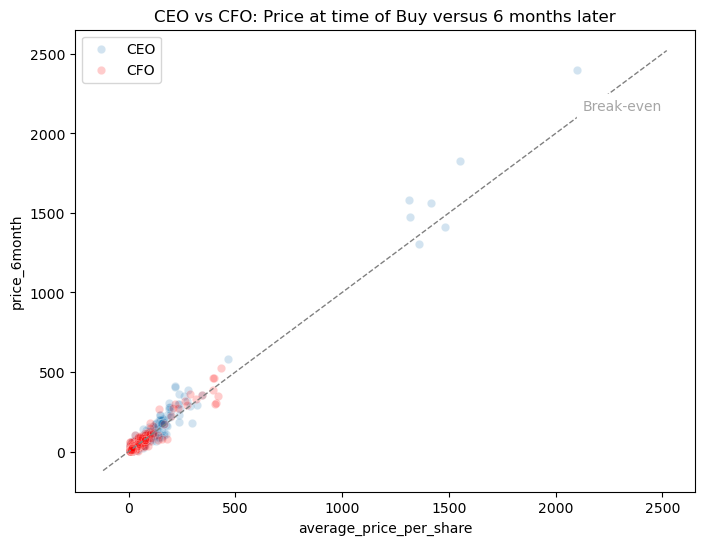

In [165]:
title = "CEO vs CFO: Price at time of Buy versus 6 months later"
create_comparison_scatterplot(
    ceo_df, cfo_df, "average_price_per_share", "price_6month", "CEO", "CFO", title=title
)

Let's zoom in on stocks where the price at time of transaction was below a certain price to see the majority of the stocks. We will make this a dynamic variable to be easily changeable.

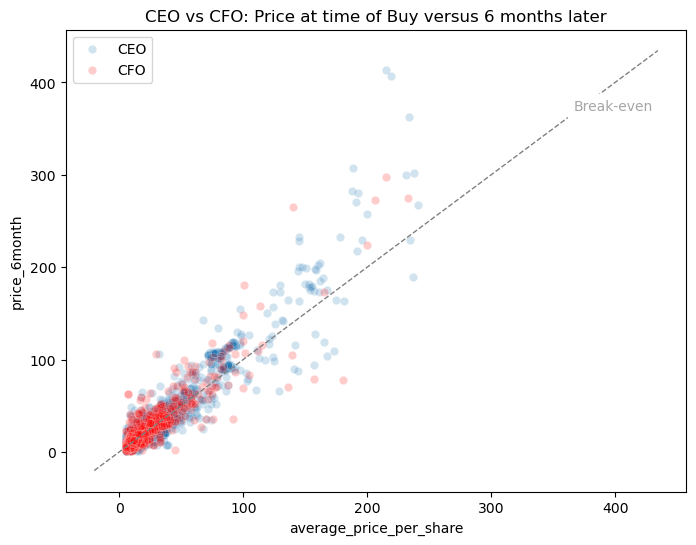

In [166]:
# price that we want zoom to
price = 250.00

# Let's Look at CEO's vs CFO's
ceo_df_small = ceo_df[ceo_df["average_price_per_share"] < price]
cfo_df_small = cfo_df[cfo_df["average_price_per_share"] < price]
title = "CEO vs CFO: Price at time of Buy versus 6 months later"

# Plot the new data
create_comparison_scatterplot(
    ceo_df_small,
    cfo_df_small,
    "average_price_per_share",
    "price_6month",
    "CEO",
    "CFO",
    title=title,
)

Finally, Let's demonstrate how we can create groups. Let's look at how well CEO's and CFO's do compared to EVP's and SVP's.

In [167]:
executives_df = complete_df[(complete_df["CFO"] == 1) | (complete_df["CEO"] == 1)]
vp_df = complete_df[(complete_df["EVP"] == 1) | (complete_df["SVP"] == 1)]
print(f"We have {executives_df.shape[0]} Executives")
print(f"We have {vp_df.shape[0]} VP's")
executives_df.head()

We have 4473 Executives
We have 1108 VP's


,Insider Name,Insider Title,Insider Role,Issuer,Ticker,CIK Code,Period of Report,Transaction Date,Security,Transaction Code,...,SLO,SMD,SVP,SVPi,See Remarks,T,TBE,VC,VP,con
130,ABRAM PETER,"CFO,SVP",Officer,FARO TECHNOLOGIES INC,FARO,917491,2014-05-28,2014-05-28,Common Stock,P,...,0,0,1,0,0,0,0,0,0,0
183,ACKERMAN JEFFREY C,"CFO,EVP",Officer,UNIFI INC,UFI,100726,2018-11-08,2018-11-08,Common Stock,P,...,0,0,0,0,0,0,0,0,0,0
184,ACKERMAN SAMUEL K,"CEO,P","Director,Officer","PANACOS PHARMACEUTICALS, INC.",PANC,1040017,2006-05-05,2006-05-05,Common Stock,P,...,0,0,0,0,0,0,0,0,0,0
435,ADAMS TIMOTHY M,CFO,Officer,"Rapid7, Inc.",RPD,1560327,2022-12-05,2022-12-05,COMMON STOCK,P,...,0,0,0,0,0,0,0,0,0,0
436,ADAMS TIMOTHY M,CFO,Officer,"Rapid7, Inc.",RPD,1560327,2022-05-09,2022-05-09,COMMON STOCK,P,...,0,0,0,0,0,0,0,0,0,0


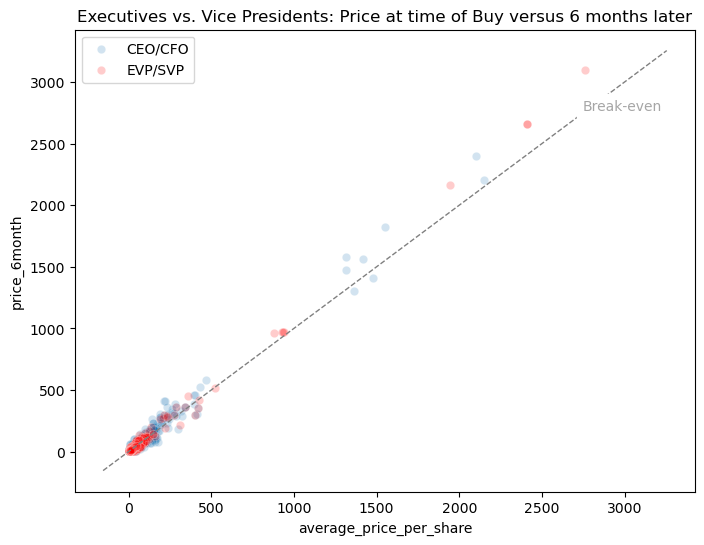

In [168]:
title = "Executives vs. Vice Presidents: Price at time of Buy versus 6 months later"
create_comparison_scatterplot(
    executives_df,
    vp_df,
    "average_price_per_share",
    "price_6month",
    "CEO/CFO",
    "EVP/SVP",
    title=title,
)

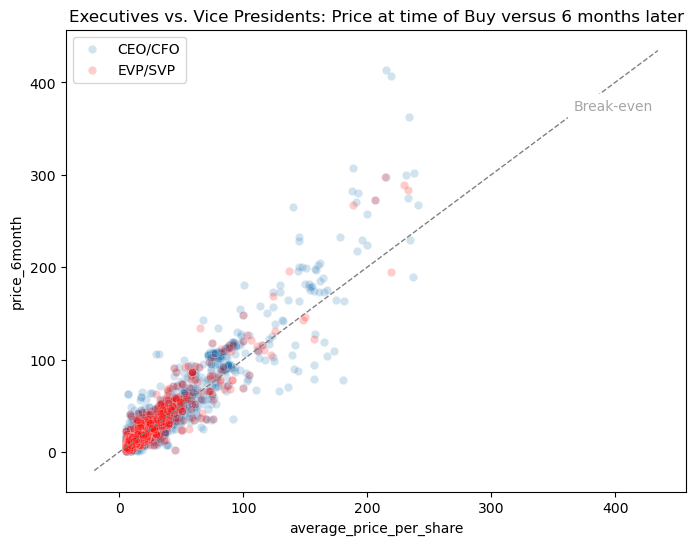

In [169]:
# Price we want to zoom in on
price = 250.00

# Filter the dataframe by price
exec_df_small = executives_df[executives_df["average_price_per_share"] < price]
vp_df_small = vp_df[vp_df["average_price_per_share"] < price]
title = "Executives vs. Vice Presidents: Price at time of Buy versus 6 months later"

# plot the new data
create_comparison_scatterplot(
    exec_df_small,
    vp_df_small,
    "average_price_per_share",
    "price_6month",
    "CEO/CFO",
    "EVP/SVP",
    title=title,
)

## Part 7: Looking at returns with comparison to the Benchmark
So far we have only been looking at whether or not the insider has been making money after six months. However, it should be a little more nuanced than this. For example, if it is a down market during that six months, a profitable trade may be considered one that didn't loose as much as the general market. One way we can do this is by finding the Excess (relative return) also known as alpha. We can do this by finding the
$$ \alpha = STOCK_{RETURN}-SPY_{RETURN}$$
This will give us an idea of whether or not the stock trade out- or under-performed compared to the market. This may give us a cleaner separation of our groups... Or it may not, we will see.

In [170]:
def get_alpha(df):
    # We need to start by calculating the Returns
    columns = df.columns

    # Let's start by finding six month stock returns
    df["stock_return_6mos"] = (df["price_6month"] - df["average_price_per_share"]) / df[
        "average_price_per_share"
    ]
    # Let's calculate the spy stock returns
    df["spy_return_6mos"] = (
        df["spy_price_6month"] - df["spy_price_transactiondate"]
    ) / df["spy_price_transactiondate"]

    # Let's calculate our alpha
    df["alpha_6mos"] = np.round((df["stock_return_6mos"] - df["spy_return_6mos"]), 4)

    return df


# Let's run the function and look at 5 random rows to make sure its correct
complete_df = get_alpha(complete_df)

# Let's take a quick look at these to make sure the calculations add up
complete_df[
    [
        "average_price_per_share",
        "price_6month",
        "stock_return_6mos",
        "spy_price_transactiondate",
        "spy_price_6month",
        "spy_return_6mos",
        "alpha_6mos",
    ]
].sample(5)


,average_price_per_share,price_6month,stock_return_6mos,spy_price_transactiondate,spy_price_6month,spy_return_6mos,alpha_6mos
10342,5.900000,2.510000,-0.574576,275.68,248.94,-0.096997,-0.4776
49226,16.150000,17.400000,0.077399,90.69,94.06,0.037160,0.0402
52502,5.253963,3.400000,-0.352869,160.22,165.17,0.030895,-0.3838
40952,6.770000,9.860000,0.456425,218.35,269.18,0.232791,0.2236
3577,17.980000,21.709999,0.207453,328.31,395.89,0.205842,0.0016


Now that we have been able to calculate all of these, let's visually inspect some of the data. First, let's look at the distribution of SPY returns and then we can plot the distribution of returns based on specific positions.

In [171]:
# Let's create a visualizations to look at the stock return distribution
def create_distribution_plot(df, x, title, color=None, bins=40):
    plt.figure(figsize=(15, 5))
    sns.histplot(df[x], kde=True, color=color, bins=bins)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.show()

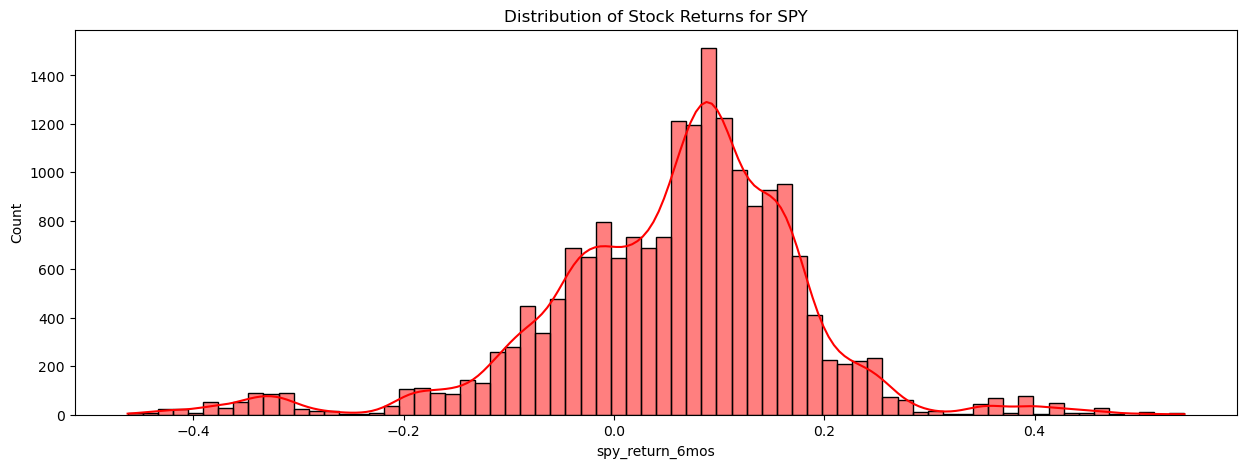

In [172]:
title = "Distribution of Stock Returns for SPY"
create_distribution_plot(
    complete_df, "spy_return_6mos", title=title, color="red", bins=70
)

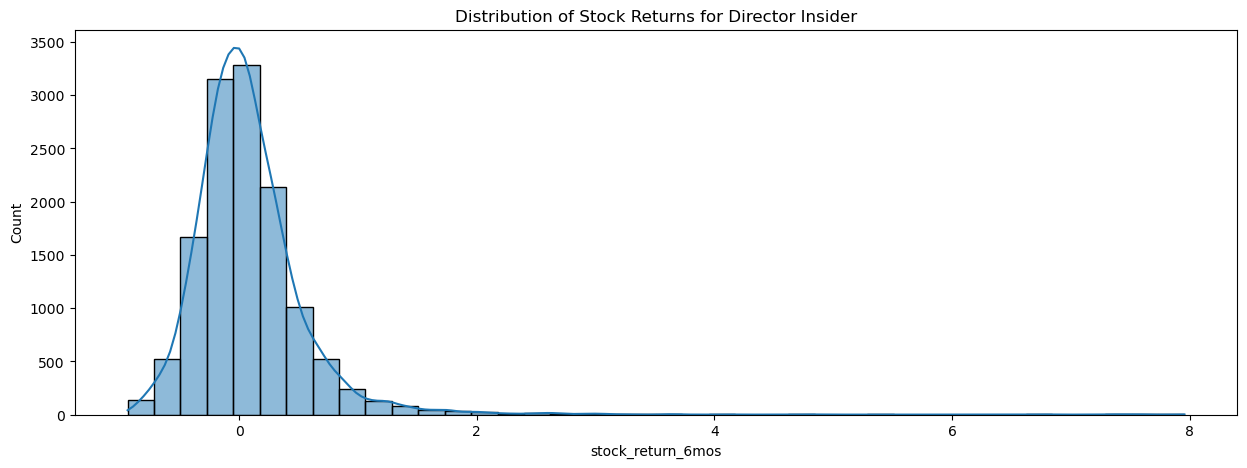

In [173]:
# Let's pick the postion that we want to look at return distribution for
position = "Director"

# Let's filter the dataframe for that position
create_distribution_plot(
    complete_df[complete_df[position] == 1],
    "stock_return_6mos",
    title=f"Distribution of Stock Returns for {position} Insider",
)

We can see a pretty heavily right skewed distribution with kurtosis (heavy tails). This is a common distribution for financial returns. This may mean that we need to check for normality prior to our hypothesis testing and use non-parametric testing for robustness. Let's take a look at a joint plot that hsows the returns from all stocks versus the SPY over 6-months along with their distribtuions.

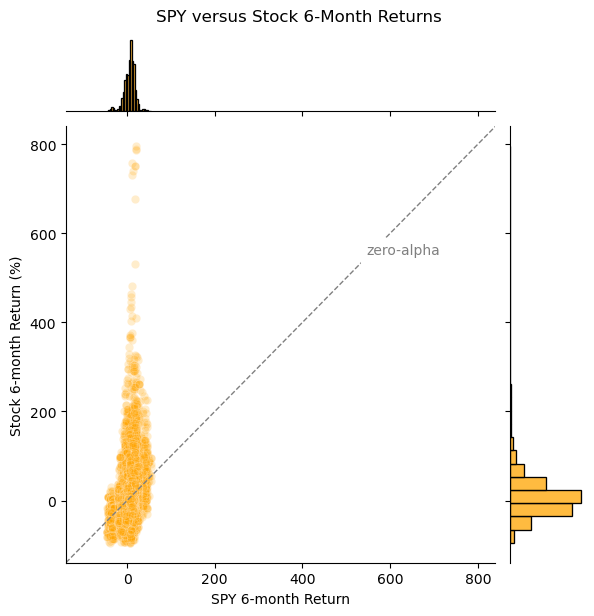

In [174]:
# Create jointplot with switched axes
g = sns.jointplot(
    x=complete_df["spy_return_6mos"] * 100,
    y=complete_df["stock_return_6mos"] * 100,
    kind="scatter",
    color="orange",
    alpha=0.2,
    marginal_kws=dict(bins=30, fill=True),
)

# Get axis limits
lims = [
    min(g.ax_joint.get_xlim()[0], g.ax_joint.get_ylim()[0]),
    max(g.ax_joint.get_xlim()[1], g.ax_joint.get_ylim()[1]),
]

# Add y = x line (zero alpha)
g.ax_joint.plot(lims, lims, linestyle="--", color="gray", linewidth=1)

# Add "zero-alpha" annotation
x_text = lims[0] + 0.7 * (lims[1] - lims[0])
g.ax_joint.text(
    x_text,
    x_text,
    "zero-alpha",
    fontsize=10,
    color="gray",
    backgroundcolor="white",
    ha="left",
    va="bottom",
)

# Set limits and axis labels
g.ax_joint.set_xlim(lims)
g.ax_joint.set_ylim(lims)
g.fig.suptitle("SPY versus Stock 6-Month Returns", y=1.02)
g.ax_joint.set_xlabel("SPY 6-month Return")
g.ax_joint.set_ylabel("Stock 6-month Return (%)")

plt.show()


As expected, the distribution of the SPY returns has a very tight distribution meaning it is relatively low voltaility (standard deviation of returns). The Stocks however, show our right skewed data however the vast majority of the data is at or around 0% returns.

Let's now take a look at how the trend of the stock reacts after an insider buys, we will compare it to the trend of the SPY. Anything above the break-even line will show that the stocks trend is outperforming the SPY in the month following insider purchases.

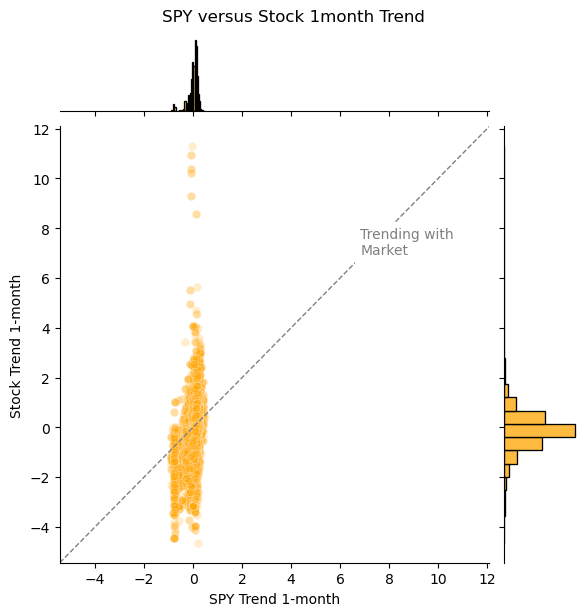

In [175]:
# Create jointplot with switched axes
g = sns.jointplot(
    x=complete_df["spy_trend_1month"] * 100,
    y=complete_df["trend_1month"] * 100,
    kind="scatter",
    color="orange",
    alpha=0.2,
    marginal_kws=dict(bins=30, fill=True),
)

# Get axis limits
lims = [
    min(g.ax_joint.get_xlim()[0], g.ax_joint.get_ylim()[0]),
    max(g.ax_joint.get_xlim()[1], g.ax_joint.get_ylim()[1]),
]

# Add y = x line (zero alpha)
g.ax_joint.plot(lims, lims, linestyle="--", color="gray", linewidth=1)

# Add "zero-alpha" annotation
x_text = lims[0] + 0.7 * (lims[1] - lims[0])
g.ax_joint.text(
    x_text,
    x_text,
    "Trending with \nMarket",
    fontsize=10,
    color="gray",
    backgroundcolor="white",
    ha="left",
    va="bottom",
)

# Set limits and axis labels
g.ax_joint.set_xlim(lims)
g.ax_joint.set_ylim(lims)
g.fig.suptitle("SPY versus Stock 1month Trend", y=1.02)
g.ax_joint.set_xlabel("SPY Trend 1-month")
g.ax_joint.set_ylabel("Stock Trend 1-month")

plt.show()

Let's look closer at the distribution of all insider tranactions versus that of benchmark. Do insiders show better returns?


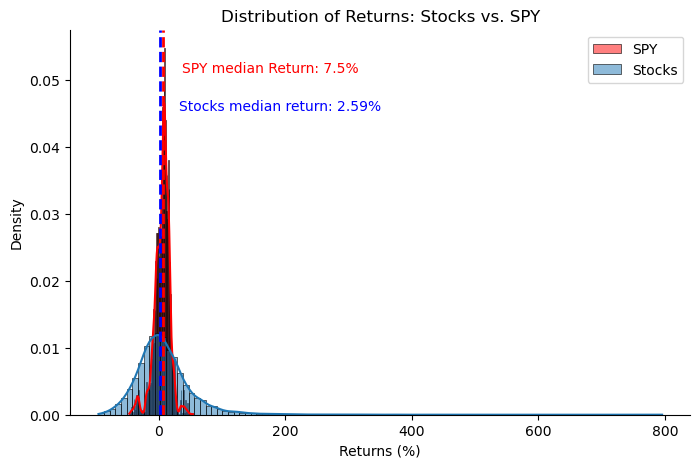

In [176]:
# Let's create a visualizations to look at the stock return distribution vs SPY this will be a one off so we don't need to make a function
plt.figure(figsize=(8, 5))

median_spy = complete_df["spy_return_6mos"].median() * 100
median_stock = complete_df["stock_return_6mos"].median() * 100

sns.histplot(
    complete_df["spy_return_6mos"] * 100,
    kde=True,
    color="red",
    bins=100,
    stat="density",
    label="SPY",
    alpha=0.5,
)
sns.histplot(
    complete_df["stock_return_6mos"] * 100,
    kde=True,
    bins=100,
    stat="density",
    label="Stocks",
    alpha=0.5,
)

# Let's pot a vertical line at each mean
plt.axvline(median_spy, color="red", linestyle="--", linewidth=2)
plt.axvline(median_stock, color="blue", linestyle="--", linewidth=2)

# Let's get data for the dynamic placement of text
ax = plt.gca()
_, y_max = ax.get_ylim()

data_min, data_max = (
    complete_df["spy_return_6mos"].min(),
    complete_df["spy_return_6mos"].max(),
)
x_offset = (data_max - data_min) * 30

# Let's annotate the values
plt.text(
    median_spy + x_offset,
    y_max * 0.9,
    f"SPY median Return: {np.round(median_spy, 2)}%",
    color="red",
    va="center",
    ha="left",
    fontsize=10,
)

plt.text(
    median_stock + x_offset,
    y_max * 0.8,
    f"Stocks median return: {np.round(median_stock, 2)}%",
    color="blue",
    va="center",
    ha="left",
    fontsize=10,
)


plt.legend()
plt.title("Distribution of Returns: Stocks vs. SPY")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("Returns (%)")
plt.ylabel("Density")
plt.show()

So, it looks like the median return for insiders (used to limit impact of outliers) is lower than that of the Benchmark, however there is a lot more variation. Our goal will be to now see if that variation is due to the role the insider plays in the company? Do CFOs and CAOs have a higher mean return then say Secretaries and Vice Presidents?

It would be interesting to see what are the top 10 positions that we have in our dataset. So let's grab all of the position columns, sum them (because they are one hot encoded) and see which has the highest value.

In [177]:
# Lets make sure we get the right columns
complete_df.columns[63:-3]

Index(['10%owner', 'Director', 'Officer', 'Other', ' CAO', ' CCPAO', ' CFO',
       ' COO', ' EM', ' EVP',
       ...
       'SLO', 'SMD', 'SVP', 'SVPi', 'See Remarks', 'T', 'TBE', 'VC', 'VP',
       'con'],
      dtype='object', length=113)

In [178]:
# Let's take all of the columns
columns = complete_df.columns

# Let's slice it to only contain the titles
positions = columns[63:-3]
positions = positions.drop("Missing")
# Now, let's sum those columns
sums = complete_df[positions].sum(axis=0)
top10 = sums.nlargest(10)
# Let's take a look at the top positions, I'm taking the top 11 because the first one is 'Missing', which means a director or 10% owner likely.
print(top10)

Director    13036
Officer      6544
10%owner     6330
CEO          3537
P            1722
C            1209
CFO           992
EVP           680
Other         457
SVP           428
dtype: int64


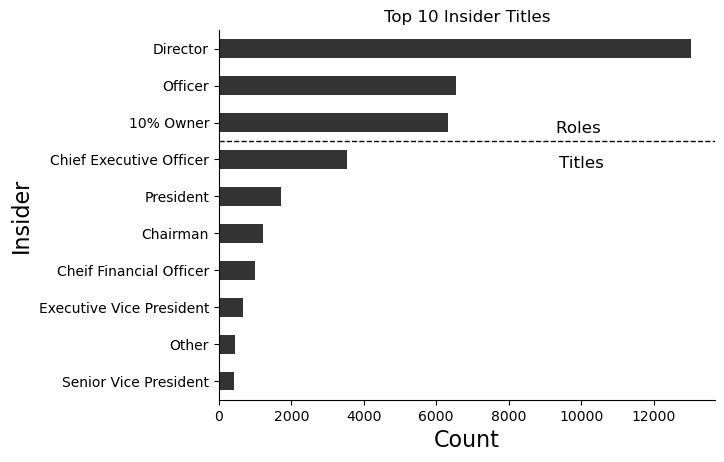

In [179]:
# Let's write out the full title name for our plot
custom_labels = [
    "Director",
    "Officer",
    "10% Owner",
    "Chief Executive Officer",
    "President",
    "Chairman",
    "Cheif Financial Officer",
    "Executive Vice President",
    "Other",
    "Senior Vice President",
]

ax = top10.plot(kind="barh", color="Black", alpha=0.8)

# Let's add a dashed line to seperate the roles and titles
sep_index = 3
# Needs to be inbetween the indices
sep_y = sep_index - 0.5

ax.axhline(y=sep_y, xmin=0, xmax=1, color="black", linestyle="--", linewidth=1)
# Let's also add some text
x_text = 10000
ax.text(
    x_text,
    sep_y + 0.8,
    "Roles \n\nTitles",
    ha="center",
    va="bottom",
    color="Black",
    fontsize=12,
)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Count", fontsize=16)
ax.set_ylabel("Insider", fontsize=16)
ax.set_yticks(range(len(top10)))
ax.set_yticklabels(custom_labels)
ax.set_title("Top 10 Insider Titles")
plt.gca().invert_yaxis()  # Have the largest at the top
plt.show()

Let's quickly plot the distributions of the top four insider titles from our data set using a box and whisker plot. This will allow us to see the general trends used to compare.

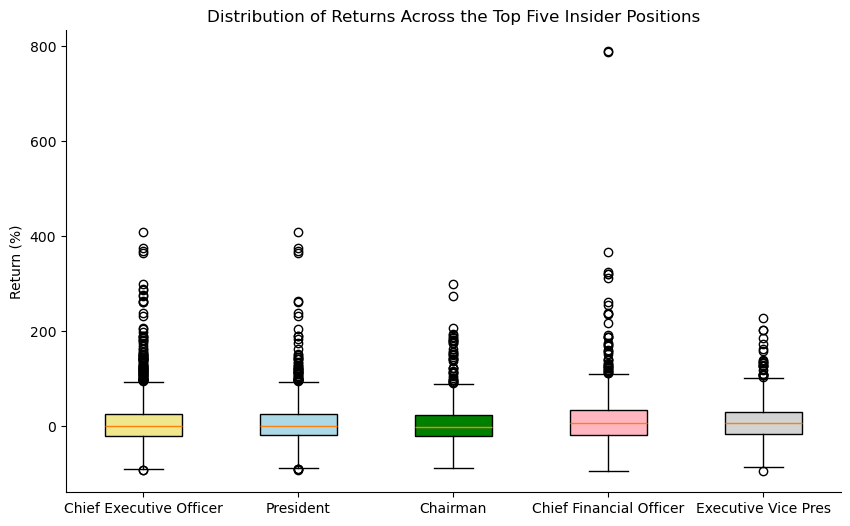

In [180]:
# first, let's set up an easy dataset to use for our box and whisker plot
ceo_series = complete_df[complete_df["CEO"] == 1]["stock_return_6mos"] * 100
p_series = complete_df[complete_df["P"] == 1]["stock_return_6mos"] * 100
chair_series = complete_df[complete_df["C"] == 1]["stock_return_6mos"] * 100
cfo_series = complete_df[complete_df["CFO"] == 1]["stock_return_6mos"] * 100
exec_vp_series = complete_df[complete_df["EVP"] == 1]["stock_return_6mos"] * 100


# Let's combine the data
data = [ceo_series, p_series, chair_series, cfo_series, exec_vp_series]

# Let's make some custom colors
colors = ["khaki", "lightblue", "green", "lightpink", "lightgray"]

plt.figure(figsize=(10, 6))
box = plt.boxplot(data, patch_artist=True)

# Fill each box with color
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(
    [1, 2, 3, 4, 5],
    [
        "Chief Executive Officer",
        "President",
        "Chairman",
        "Chief Financial Officer",
        "Executive Vice Pres",
    ],
)
plt.ylabel("Return (%)")
plt.title("Distribution of Returns Across the Top Five Insider Positions")
plt.show()


This is a great way to visualize the descriptive characteristics of each postion, but it may help if we look at the distribution at the same time using a violin plot. Let's see what that would look like.

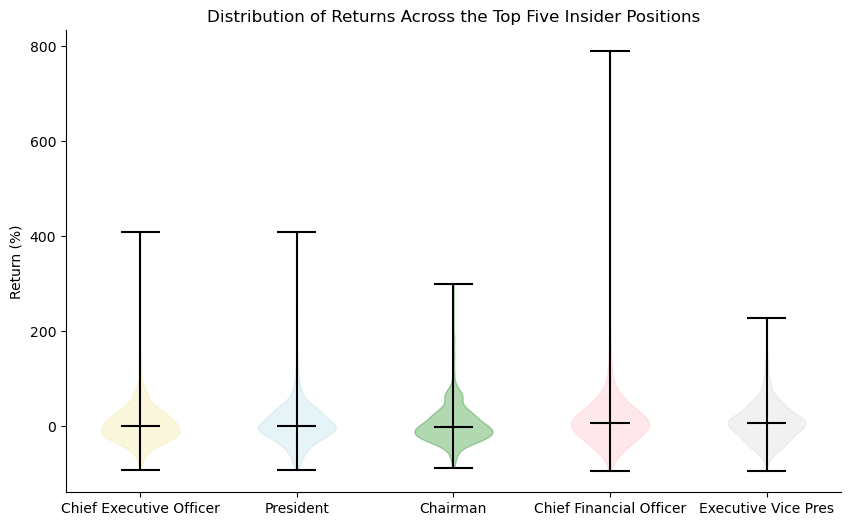

In [181]:
# first, let's set up an easy dataset to use for our box and whisker plot
ceo_series = complete_df[complete_df["CEO"] == 1]["stock_return_6mos"] * 100
p_series = complete_df[complete_df["P"] == 1]["stock_return_6mos"] * 100
chair_series = complete_df[complete_df["C"] == 1]["stock_return_6mos"] * 100
cfo_series = complete_df[complete_df["CFO"] == 1]["stock_return_6mos"] * 100
exec_vp_series = complete_df[complete_df["EVP"] == 1]["stock_return_6mos"] * 100


# Let's combine the data
data = [ceo_series, p_series, chair_series, cfo_series, exec_vp_series]

# Let's make some custom colors
colors = ["khaki", "lightblue", "green", "lightpink", "lightgray"]

plt.figure(figsize=(10, 6))
violin = plt.violinplot(data, showmedians=True)

#Let's change the colors, here this is a little different
for idx in range(0,5):
    violin['bodies'][idx].set_color(colors[idx])

violin['cbars'].set_color('black')
violin['cmaxes'].set_color('black')
violin['cmedians'].set_color('black')
violin['cmins'].set_color('black')


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(
    [1, 2, 3, 4, 5],
    [
        "Chief Executive Officer",
        "President",
        "Chairman",
        "Chief Financial Officer",
        "Executive Vice Pres",
    ],
)
plt.ylabel("Return (%)")
plt.title("Distribution of Returns Across the Top Five Insider Positions")
plt.show()

In a later test, we will test the hypothesis that there are differnces in returns based on the postion the insider holds.

Let's plot stock return versus the spy return for different postions. Let's start by looking at CEO's vs. Presidents. Here we will include a price and positions variables for filtering the visualizations easily instead of repeating code.

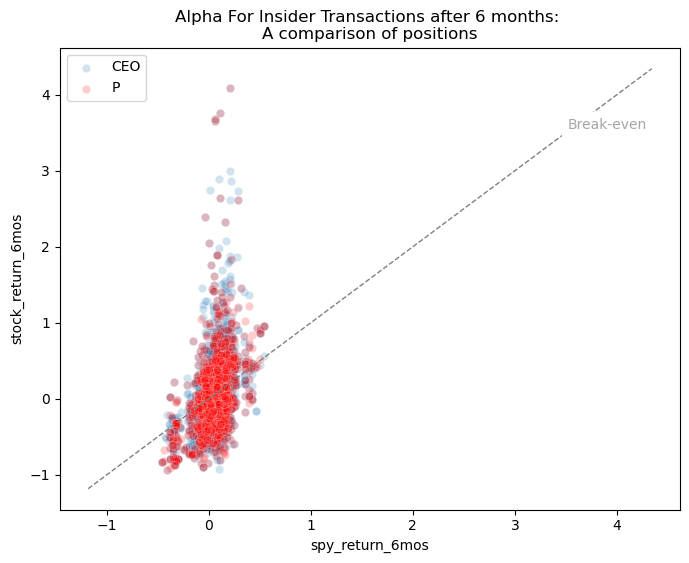

In [182]:
# Price we want to zoom in on
price = 250.00
# Position we Want
position1 = "CEO"
position2 = "P"


position1_df = complete_df[
    (complete_df[position1] == 1) & (complete_df["average_price_per_share"] < price)
]
position2_df = complete_df[
    (complete_df[position2] == 1) & (complete_df["average_price_per_share"] < price)
]

create_comparison_scatterplot(
    position1_df,
    position2_df,
    "spy_return_6mos",
    "stock_return_6mos",
    position1,
    position2,
    "Alpha For Insider Transactions after 6 months: \nA comparison of positions",
)

Now, we can also look at the distributions between insider positions.

In [183]:
def create_distribution_comparison_plot(
    df,
    x1,
    x2,
    position1,
    position2=position1,
    title=f"{position1} vs. {position2}",
    log_scale=False,
    stat="mean",
):
    # Let's create a visualizations to look at the stock return distribution
    plt.figure(figsize=(15, 5))
    sns.histplot(
        df[df[position1] == 1][x1] * 100,
        kde=True,
        color="red",
        bins=100,
        stat="density",
        label=position1,
    )
    sns.histplot(
        df[df[position2] == 1][x2] * 100,
        kde=True,
        bins=100,
        stat="density",
        label=position2,
    )

    if stat.lower() == "mean":
        # Let's calculate the mean for each so that we can plot it
        stat1 = df[df[position1] == 1][x1].mean() * 100
        stat2 = df[df[position2] == 1][x2].mean() * 100
    elif stat.lower() == "median":
        # Let's calculate the mean for each so that we can plot it
        stat1 = df[df[position] == 1][x1].median() * 100
        stat2 = df[df[position] == 1][x2].median() * 100

    # Let's pot a vertical line at each mean
    plt.axvline(stat1, color="red", linestyle="--", linewidth=2)
    plt.axvline(stat2, color="blue", linestyle="--", linewidth=2)

    # Let's get data for the dynamic placement of text
    ax = plt.gca()
    _, y_max = ax.get_ylim()

    data_min, data_max = df[x1].min(), df[x1].max()
    x_offset = (data_max - data_min) * 0.02

    # Let's annotate the values
    if x1 == x2:
        plt.text(
            stat1 + x_offset,
            y_max * 0.9,
            f"{position1} {stat}: {np.round(stat1, 2)}%",
            color="red",
            va="center",
            ha="left",
            fontsize=10,
        )
    else:
        plt.text(
            stat1 + x_offset,
            y_max * 0.9,
            f"{x1} {stat}: {np.round(stat1, 2)}%",
            color="red",
            va="center",
            ha="left",
            fontsize=10,
        )
    if x1 == x2:
        plt.text(
            stat2 + x_offset,
            y_max * 0.8,
            f"{position2} {stat}: {np.round(stat2, 2)}%",
            color="blue",
            va="center",
            ha="left",
            fontsize=10,
        )
    else:
        plt.text(
            stat2 + x_offset,
            y_max * 0.8,
            f"{x2} {stat}: {np.round(stat2, 2)}%",
            color="blue",
            va="center",
            ha="left",
            fontsize=10,
        )

    plt.legend()
    plt.title(title)
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlabel("Returns (%)")
    if log_scale:
        # If we want to simulate a log scale uncomment the following line
        plt.xscale("symlog", linthresh=0.01)
    plt.ylabel("Density")
    plt.show()

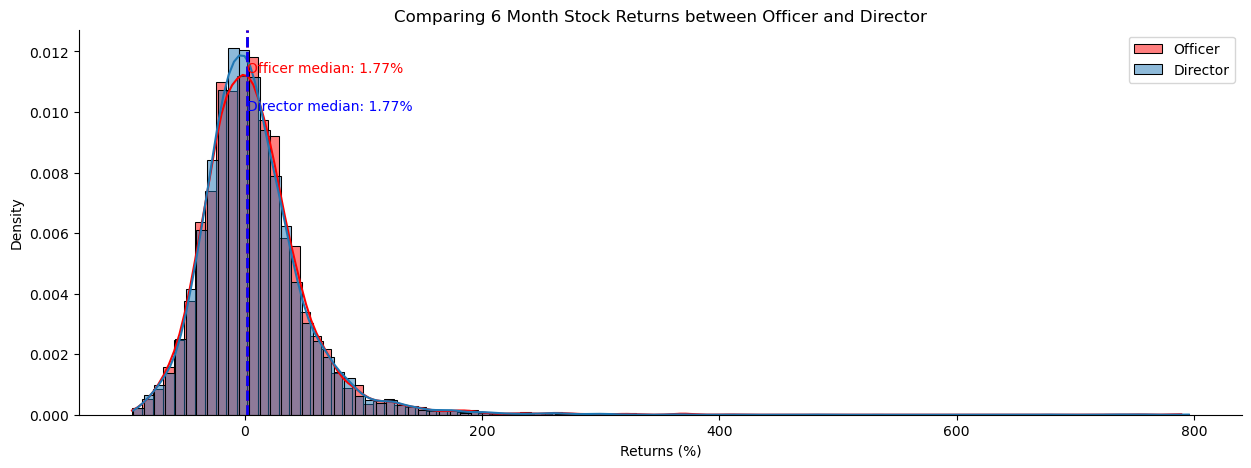

In [184]:
# Let's pick the positions we want to compare
position1 = "Officer"
position2 = "Director"
variable1 = "stock_return_6mos"
title = f"Comparing 6 Month Stock Returns between {position1} and {position2}"
stat = "median"

# Let's create a plot
create_distribution_comparison_plot(
    complete_df, variable1, variable1, position1, position2, title=title, stat=stat
)

## Part 8: Statistical Modeling of Data and Hypothesis Testing

This is not looking very promising for any form of staistically signifcant alpha found through tracking general insider trades. First, let's check and see if the data is considered normally distributed because the skew has such small values. We can use scipy.stats

In [185]:
def check_normality(data: pd.Series):
    # We are getting a nan value, this may mean there is bad data
    nonfinite = data[~np.isfinite(data)]
    # print(nonfinite)

    # Test with a Shapiro-Wilk Tests
    stat, p_normal = shapiro(data)
    # print(p_normal)

    if p_normal > 0.05:
        print(
            f"The data for {position} insiders is normally distributed and a t-test can be used for hypothesis testing\n"
        )
    else:
        print(f"The data for {position} insiders is not normally distributed\n")
    return stat, p_normal

In [186]:
# Let's Check the complete stock return data set
position = "all"
data = complete_df["stock_return_6mos"]
stat, p_normal = check_normality(data)

The data for all insiders is not normally distributed



c:\Users\tmacp\anaconda3\envs\InsiderTrading\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19302.
  res = hypotest_fun_out(*samples, **kwds)


In [187]:
# Let's make a quick cell to check individual positions
position = "Officer"
data = complete_df[complete_df[position] == 1]["stock_return_6mos"]

stat, p_normal = check_normality(data)

The data for Officer insiders is not normally distributed



c:\Users\tmacp\anaconda3\envs\InsiderTrading\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6544.
  res = hypotest_fun_out(*samples, **kwds)


It appears our data is not normally distributed, we can futher check the excess kurtosis using the Fisher's Kurtosis test in scipy which subtracts 3 (normal) from the Pearsons Kurtosis.

In [188]:
def check_kurtosis(data: pd.Series):
    # Financial return data is often right skewed so we will setup for that
    excess_kurt = kurtosis(data, fisher=True, bias=False)
    if excess_kurt > 0:
        print(f"The data has excess kurtosis of {np.round(excess_kurt, 2)}")
    elif excess_kurt == 0:
        print("The data has a normal kurtosis")
    else:
        print(f"The data has negative kurtosis of {np.round(excess_kurt, 2)}")

In [189]:
# Let's check the kurtosis of Full Stock Data
data = complete_df["stock_return_6mos"]
check_kurtosis(data)

The data has excess kurtosis of 36.31


Turns out, upon reviewing the lectures for our complete oral exam, we can use pandas to calculate the Fisher's Kurtosis as well. So let's try that.

In [190]:
pandas_kurtosis = float(np.round(complete_df["stock_return_6mos"].kurt(),2))
print(f"The data has excess kurtosis of {pandas_kurtosis}")

The data has excess kurtosis of 36.31


In [191]:
# Let's check the kurtosis of our trusty Officers
data = complete_df[complete_df["Officer"] == 1]["stock_return_6mos"]
check_kurtosis(data)

The data has excess kurtosis of 37.75


We can also easily check for the skew of the data using scipy.stats skew method.


In [192]:
def check_skew(data: pd.Series):
    # Financial return data is often right skewed so we will setup for that
    skewed = skew(data)
    if skewed > 0:
        print(f"The data has right (positive) skew: {np.round(skewed, 2)}")
    elif skewed == 0:
        print("The data has no Skew")
    else:
        print(f"The data has a left (negative) skew: {np.round(skewed, 2)}")

In [193]:
check_skew(data)

The data has right (positive) skew: 3.51


So the data is not normally distributed however because of the size of our N, the p-value may be inaccurate. Non-normality is what we expected with the high kurtosis but we can confirm using a QQ Plot

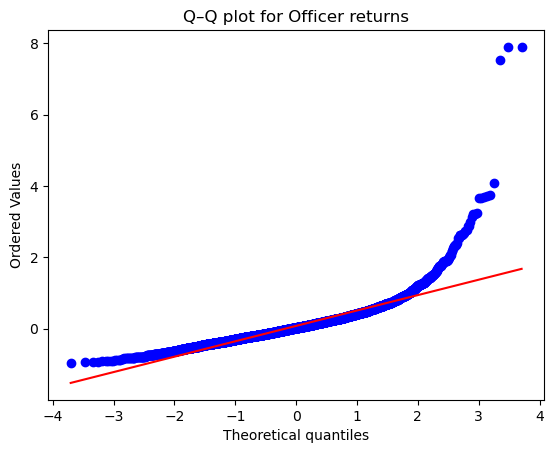

In [217]:
probplot(data, dist="norm", plot=plt.gca())
plt.title(f"Q–Q plot for {position} returns")
plt.show()

Once again, this shows a heavily right skewed array for most of the positions. We can potentially use a log transformation to bring the data closer to a normal distribution. However, because we are using returns with negative values we need to shift all values to be positive.

In [218]:
def log_transform(data: pd.Series):
    # Let's shift all of the data to positive values
    shifted = abs(data.min()) + 1  # add one so we have no zeros
    transformed = np.log(data + shifted)
    return transformed


# Rerun rest with a Shapiro-Wilk Tests
stat, p_normal = check_normality(log_transform(data))

The data for Officer insiders is not normally distributed



c:\Users\tmacp\anaconda3\envs\InsiderTrading\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6544.
  res = hypotest_fun_out(*samples, **kwds)


Okay, the data is still not normally distributed even when we tried to force it into normality. So, it may be a good idea to use a non-parametric test for robustness.

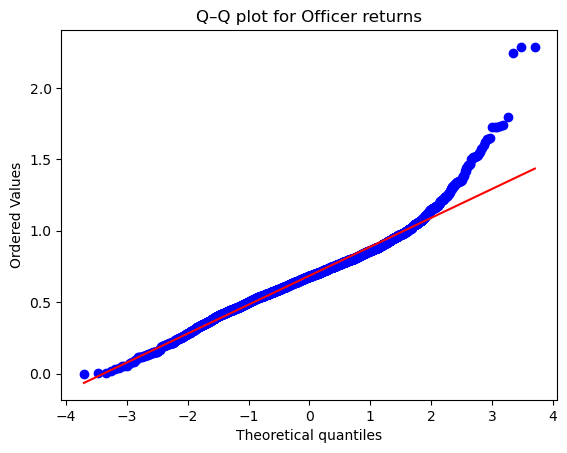

In [221]:
probplot(log_transform(data), dist="norm", plot=plt)
plt.title(f"Q–Q plot for {position} returns")
plt.show()

Even with the transfomrations we are not finding normality, and we don't want to force it so it is probably better to use a nonparametric test like the wilcoxon_test for paired data (SPY vs Stock at same time period) and the Mann Whitney Test for stock comparisons (unpaired different time periods).

In [197]:
def mannwhitney_test(pos1_data, pos2_data, position1, position2):
    # Let's run our hypothesis test
    ustat, p_val = mannwhitneyu(pos1_data, pos2_data, alternative="two-sided")
    print(f"Mann Whitney P-Value: {p_val}")
    if p_val > 0.05:
        print(
            f"There is not a significant difference between {position1} & {position2} "
        )
    else:
        print(f"There is a significant difference between {position1} & {position2}")
    return ustat, p_val

In [198]:
position1 = "CEO"
position2 = "CFO"

# Let's get our arrays
pos1_data = complete_df[complete_df[position1] == 1]["stock_return_6mos"]
pos2_data = complete_df[complete_df[position2] == 1]["stock_return_6mos"]

ustat, p_val = mannwhitney_test(pos1_data, pos2_data, position1, position2)

Mann Whitney P-Value: 1.8440697801581654e-05
There is a significant difference between CEO & CFO


In [199]:
# Let's also create a test to compare positions to the overall SPY return
position = "CEO"

# Let's get our arrays
pos1_data = complete_df[complete_df[position] == 1]["stock_return_6mos"]
spy_data = complete_df["spy_return_6mos"]

usstat, p_val = mannwhitneyu(pos1_data, spy_data, alternative="two-sided")
print(p_val)

1.647597635970601e-31


Not surprisingly, we have no signifcant difference between insiders but let's look at whether there is a difference from a group compared to the benchmark spy to see if following the insiders gives us an advantage

In [200]:
position = "Officer"

# Let's get our arrays
pos1_data = complete_df[complete_df[position] == 1]["stock_return_6mos"]
pos2_data = complete_df[complete_df[position] == 1]["spy_return_6mos"]

# Let's run the test
ustat, p_val = mannwhitney_test(pos1_data, pos2_data, "Officer Stock", "the SPY")

Mann Whitney P-Value: 2.407286062808542e-17
There is a significant difference between Officer Stock & the SPY


Let's inspect it visually and see if anything stands out so that we can address this. Two things to note, the spy and stock returns are for the same time periods so they are paired samples. So we should probably use the Wilcoxon signed-rank test.

In [201]:
# Let's perform a Wilcoxon test on all insider transactions versus the SPY
stat, p_paired = wilcoxon(
    complete_df["stock_return_6mos"], complete_df["spy_return_6mos"]
)
if p_val > 0.05:
    print("There is not a significant difference between Stock & SPY returns")
else:
    print("There is a significant difference between Stock & SPY returns")

There is a significant difference between Stock & SPY returns


We find that there is a significant difference between general returns from stocks versus the returns over six months from the broader market. We will visualize this in an upcoming cell.

In [202]:
# Let's create a function to run our statistical tests to compare roles and titles
def wilcoxon_test(pos1_data, pos2_data, position1, position2):
    # Let's run our hypothesis test
    stat, p_paired = wilcoxon(pos1_data, pos2_data)
    print(f"Wilcoxon p-value: {p_paired:.2e}")

    if p_val > 0.05:
        print(
            f"There is not a significant difference between {position1} & {position2}"
        )
    else:
        print(f"There is a significant difference between {position1} & {position2}")
    return stat, p_paired

In [203]:
# Let's repeat the mannwhitney_test
position = "Officer"

# Let's get our arrays
pos1_data = complete_df[complete_df[position] == 1]["stock_return_6mos"]
pos2_data = complete_df[complete_df[position] == 1]["spy_return_6mos"]
stat, p_paired = wilcoxon_test(pos1_data, pos2_data, "Officer Stock", "the SPY")

Wilcoxon p-value: 4.83e-10
There is a significant difference between Officer Stock & the SPY


We find that we still have a significant difference. Now, because this is non-parametric, it is essentially comparing the rank or central tendency (median) more so then the mean, which is what we want. So let's plot that to visually see it. First we will demonstrate how the mean can be misleading based on the right-skewed data.

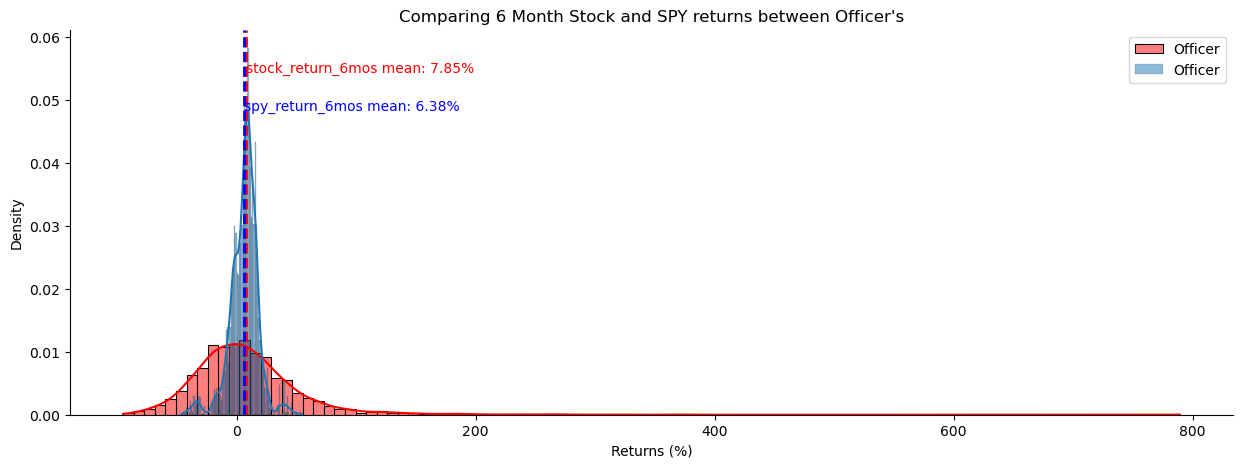

In [204]:
# Let's pick the positions we want to compare
position1 = "Officer"
position2 = "Officer"
variable1 = "stock_return_6mos"
variable2 = "spy_return_6mos"
title = f"Comparing 6 Month Stock and SPY returns between {position1}'s"
stat = "mean"

# Let's create a plot
create_distribution_comparison_plot(
    complete_df, variable1, variable2, position1, position2, title=title, stat=stat
)

When visualizing the distribution of returns, we see that the stocks median return actually significantly under performs the market.

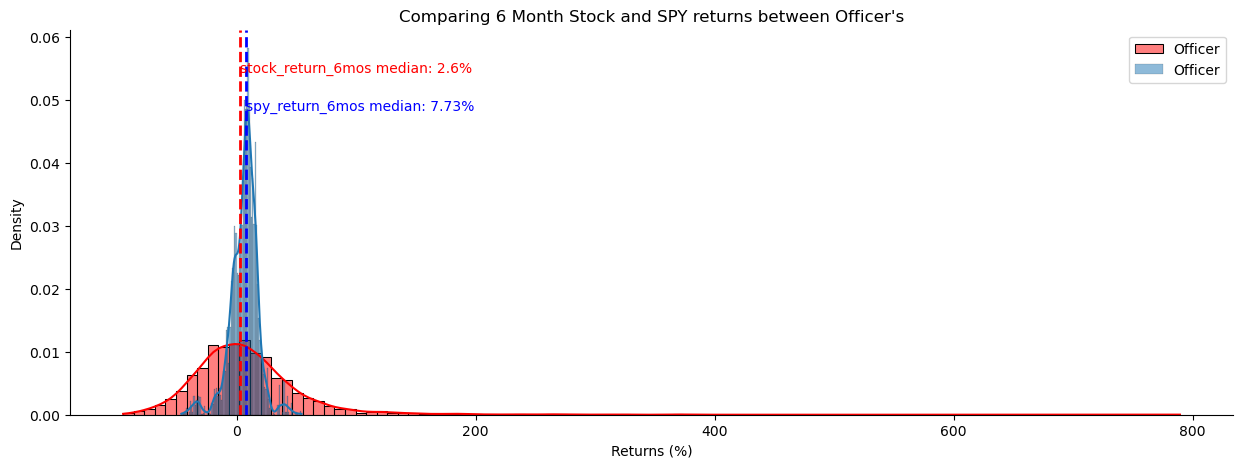

In [205]:
# Let's pick the positions we want to compare
position1 = "Officer"
position2 = "Officer"
variable1 = "stock_return_6mos"
variable2 = "spy_return_6mos"
title = f"Comparing 6 Month Stock and SPY returns between {position1}'s"
stat = "median"

# Let's create a plot
create_distribution_comparison_plot(
    complete_df, variable1, variable2, position1, position2, title=title, stat=stat
)

Here, it is looking like the insiders 'beat' the benchmark when taking the mean, however, when we look at the median, they consistently under perform the market. This is an important distinction when we are looking at how to present the results. The mean is affected by the outliers of 800% returns etc.

Now that we have looked at insiders versus the benchmark, we can futher investigate whether the relative returns are better for specific insiders (i.e. CFO versus CEO)

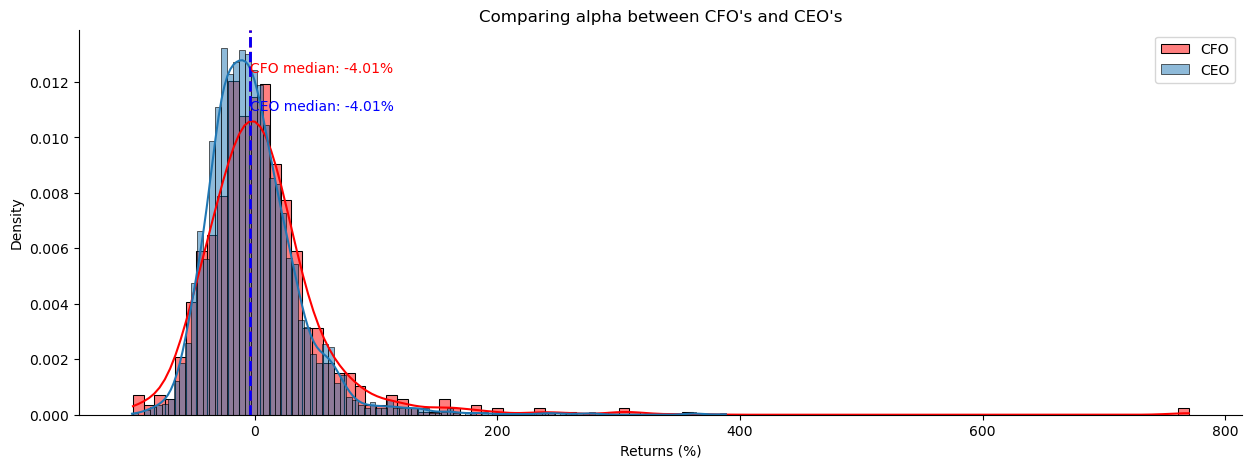

In [206]:
# Let's pick the positions we want to compare
position1 = "CFO"
position2 = "CEO"
variable1 = "alpha_6mos"
variable2 = "alpha_6mos"
title = f"Comparing alpha between {position1}'s and {position2}'s"
stat = "median"

# Let's create a plot
create_distribution_comparison_plot(
    complete_df, variable1, variable2, position1, position2, title=title, stat=stat
)

Another interesting thing that we can look at is how the trend in the stock changes after the insider buys. Does it increase, decrease etc. So let's plot the trend for the month beofre and the month after.

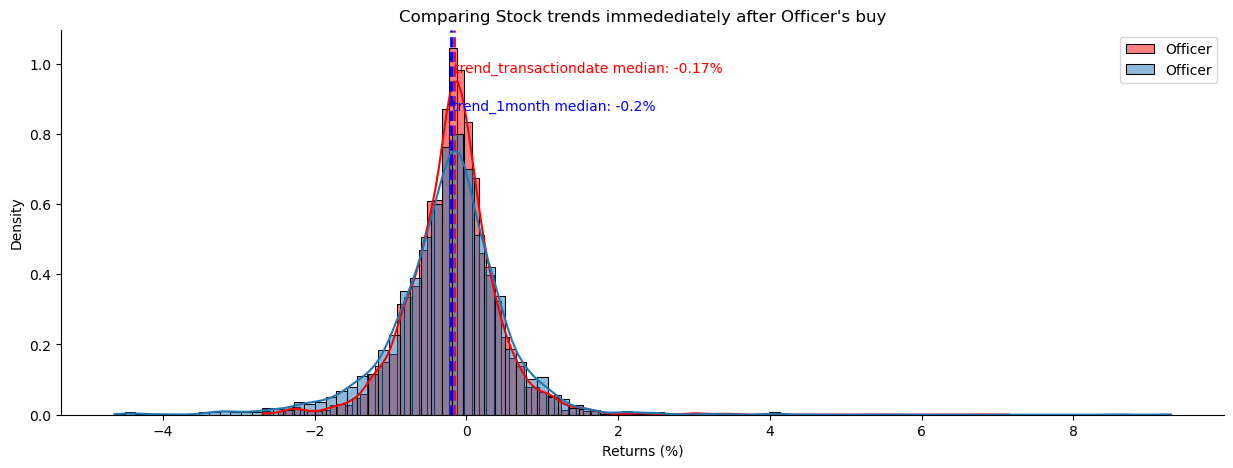

In [207]:
# Let's pick the positions we want to compare
position1 = "Officer"
position2 = "Officer"
variable1 = "trend_transactiondate"
variable2 = "trend_1month"
title = f"Comparing Stock trends immedediately after {position1}'s buy"
stat = "median"

# Let's create a plot
create_distribution_comparison_plot(
    complete_df, variable1, variable2, position1, position2, title=title, stat=stat
)

So, it appears as though the officers typically purchased while the stocks were in a monthly downtrend lossing a about 0.17% per day leading up to the purchase. Interestingly, this trend continued after the purchase with a slight acceleration. Let's compare them directly to see the distribution.

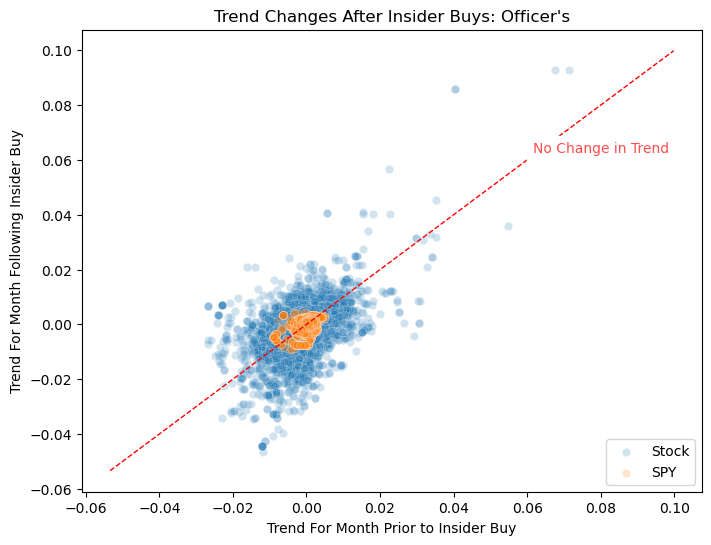

In [208]:
# Position we Want
position = "Officer"


position_df = complete_df[
    (complete_df[position] == 1) & (complete_df["average_price_per_share"])
]

# Let's Look at trends for the month leading up and the month after
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=position_df,
    x="trend_transactiondate",
    y="trend_1month",
    alpha=0.2,
    label="Stock",
)
sns.scatterplot(
    data=position_df,
    x="spy_trend_transactiondate",
    y="spy_trend_1month",
    alpha=0.2,
    label="SPY",
)


# Let's put in a 45degree line to show break even
ax = plt.gca()
lims = [
    min(ax.get_xlim()[0], ax.get_ylim()[0]),
    max(ax.get_xlim()[1], ax.get_ylim()[1]),
]
plt.plot(lims, lims, linestyle="--", color="red", linewidth=1)

# Lets give it an annotation
x_text = lims[0] + 0.75 * (lims[1] - lims[0])
y_text = x_text
plt.text(
    x_text,
    y_text,
    "No Change in Trend",
    ha="left",
    va="bottom",
    fontsize=10,
    color="red",
    backgroundcolor="white",
    alpha=0.7,
)
plt.legend(loc="lower right")
plt.xlabel("Trend For Month Prior to Insider Buy")
plt.ylabel("Trend For Month Following Insider Buy")
plt.title("Trend Changes After Insider Buys: Officer's")
plt.show()

This has been an excellent first look into the data with some statistical comparisons and findings regarding the general insider trading performance. Unfortunately, we have found that insiders genearlly under perform in comparison to the market and even corporate positions that have access to the financials didn't seem to make a difference. It may be a good idea to start looking at specific individuals and see if there are any insiders specifically that we should follow due to out performance of the market.